In [242]:
import pandas as pd
import numpy as np

In [244]:
data = pd.read_csv("new_encoded_df.csv")

In [246]:
data

,company_encoded,rating,job_simp,employer_estimate,avg_salary,Founded,Revenue,age_of_company,seniority,avg_size,...,data scientist,director,intern,machine learning engineer,manager,manager data scientist,nlp engineer,other.2,python automation,software developer
0,3,4.1,manager,0,550000.0,1837,9,187.0,2.0,15000.0,...,0,0,0,0,1,0,0,0,0,0
1,8,4.1,analyst,0,600000.0,1860,9,164.0,0.0,15000.0,...,0,0,0,0,0,0,0,0,0,0
2,7,4.2,data engineer,0,550000.0,1999,1,25.0,1.0,451.0,...,0,0,0,0,0,0,0,0,0,0
3,9,4.2,other,1,1400000.0,1982,7,42.0,2.0,15000.0,...,0,0,0,0,0,0,0,1,0,0
4,8,4.1,data scientist,1,17500.0,1860,9,164.0,0.0,15000.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,3,3.9,analyst,0,-1.0,2009,1,15.0,1.0,3501.0,...,0,0,0,0,0,0,0,0,0,0
264,1,3.8,data engineer,0,-1.0,2007,8,17.0,1.0,15000.0,...,0,0,0,0,0,0,0,0,0,0
265,4,4.0,data scientist,0,-1.0,1995,9,29.0,1.0,15000.0,...,1,0,0,0,0,0,0,0,0,0
266,1,3.9,intern,0,-1.0,2009,7,15.0,0.0,3501.0,...,0,0,1,0,0,0,0,0,0,0


In [248]:
data = data.drop(columns=['Founded'])

### Just kept description aside for the time being

In [250]:
description = pd.read_csv("final_data.csv")

In [252]:
description = description[['job_description']]

In [276]:
description.shape

(374, 1)

In [256]:
#description.to_csv("job_description.csv", index = False)

### Train test Split

In [14]:
train_data = data[data['avg_salary'] != -1]
xtrain = train_data.drop("avg_salary", axis = 1)
ytrain = train_data["avg_salary"]

test_data = data[data['avg_salary'] == -1]
xtest = test_data.drop('avg_salary', axis = 1)

In [16]:
xtrain.shape, xtest.shape, ytrain.shape

((123, 208), (145, 208), (123,))

In [18]:
xtrain.duplicated().sum()

7

In [20]:
xtest.duplicated().sum()

4

### Scaling

In [23]:
data.describe()

,company_encoded,rating,employer_estimate,avg_salary,Revenue,age_of_company,seniority,avg_size,len_description,.net,...,data scientist,director,intern,machine learning engineer,manager,manager data scientist,nlp engineer,other.2,python automation,software developer
count,268.000000,268.000000,268.000000,2.680000e+02,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,...,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,24.708955,4.016791,0.078358,2.807327e+05,6.514925,71.070896,1.190299,11617.828358,218.940299,0.003731,...,0.212687,0.007463,0.022388,0.029851,0.055970,0.007463,0.041045,0.074627,0.003731,0.104478
std,31.568088,0.248851,0.269237,3.907905e+05,3.065417,61.526270,0.645627,5701.697393,20.625159,0.061085,...,0.409973,0.086225,0.148219,0.170494,0.230294,0.086225,0.198765,0.263280,0.061085,0.306451
min,1.000000,3.200000,0.000000,-1.000000e+00,1.000000,1.000000,0.000000,0.000000,108.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.800000,0.000000,-1.000000e+00,5.000000,25.000000,1.000000,10001.000000,210.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.100000,0.000000,-1.000000e+00,8.000000,61.000000,1.000000,15000.000000,221.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,4.200000,0.000000,6.000000e+05,9.000000,108.000000,2.000000,15000.000000,231.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,75.000000,4.600000,1.000000,3.250000e+06,9.000000,334.000000,2.000000,15000.000000,258.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
cols_scale_train = xtrain[['rating', 'age_of_company','avg_size','company_encoded','Revenue','len_description']]
cols_scale_test = xtest[['rating', 'age_of_company','avg_size','company_encoded','Revenue','len_description']]

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
xtrain_scaled = scaler1.fit_transform(cols_scale_train)
xtest_scaled = scaler1.transform(cols_scale_test)

In [29]:
xtrain_scaled = pd.DataFrame(xtrain_scaled, columns = cols_scale_train.columns)
xtest_scaled = pd.DataFrame(xtest_scaled, columns = cols_scale_test.columns)

In [31]:
xtrain_scaled

,rating,age_of_company,avg_size,company_encoded,Revenue,len_description
0,0.642857,0.558559,1.000000,0.027027,1.00,0.666667
1,0.642857,0.489489,1.000000,0.094595,1.00,0.820000
2,0.714286,0.072072,0.030067,0.081081,0.00,0.640000
3,0.714286,0.123123,1.000000,0.108108,0.75,0.586667
4,0.642857,0.489489,1.000000,0.094595,1.00,0.793333
...,...,...,...,...,...,...
118,0.428571,0.321321,1.000000,0.162162,1.00,0.646667
119,0.428571,0.210210,0.666733,0.054054,0.75,0.800000
120,0.571429,0.027027,0.030067,0.040541,0.00,0.760000
121,0.714286,0.072072,0.030067,0.081081,0.00,0.640000


In [41]:
xtrain = xtrain.reset_index(drop = 'first')
xtest = xtest.reset_index(drop = 'first')
ytrain = ytrain.reset_index(drop='first')

In [43]:
xtrain.drop(columns=['rating', 'age_of_company','avg_size','company_encoded','Revenue','len_description'], inplace = True)
xtrain = pd.concat([xtrain, xtrain_scaled], axis = 1)

In [45]:
xtest.drop(columns=['rating', 'age_of_company','avg_size','company_encoded','Revenue','len_description'], inplace = True)
xtest = pd.concat([xtest, xtest_scaled], axis = 1)

### Model Building without Job Description

In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(xtrain, ytrain)
lr_pred = lr.predict(xtrain)

### Evaluation

In [59]:
def evaluate(xtrain, ytrain, model):
    import numpy as np
    from sklearn.model_selection import KFold
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import numpy as np
    
    # Define KFold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Store the scores
    r2_scores = []
    mae_scores = []
    mse_scores = []
    rmse_scores = []
        
    # Perform cross-validation
    for train_index, val_index in kf.split(xtrain):
        # note that agr xtrain is df then use iloc otherwise on arrays iloc won't work and vice versa
        if not isinstance(xtrain, np.ndarray):
            X_train, X_val = xtrain.values[train_index], xtrain.values[val_index]
        else:
            X_train, X_val = xtrain[train_index], xtrain[val_index]
        y_train, y_val = ytrain.iloc[train_index], ytrain.iloc[val_index]
        
        # Create the model
        #model = create_model()
        
        # Train the model
        model.fit(X_train, y_train)
        ypred = model.predict(X_val)
        
        # Evaluate the model on the validation set
        # r2score = r2_score(y_val, ypred)
        # cv_scores.append(score)

        mae_scores.append(mean_absolute_error(y_val, ypred))
        mse_scores.append(mean_squared_error(y_val, ypred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_val, ypred)))
        r2_scores.append(r2_score(y_val, ypred))
        
    # Print the cross-validation scores
    print("Cross-validation r2 scores:", r2_scores)
    print("Average r2 score:", np.mean(r2_scores))
    
    print("Cross-validation MAE scores:", mae_scores)
    print(f"Average MAE: {np.mean(mae_scores)}")
    
    print("Cross-validation MSE scores:", mse_scores)
    print(f"Average MSE: {np.mean(mse_scores)}")
    
    print("Cross-validation RMSE scores:", rmse_scores)
    print(f"Average RMSE: {np.mean(rmse_scores)}")


In [29]:
evaluate(xtrain, ytrain, lr)

Cross-validation r2 scores: [-1.026464145162608e+21, -2.061101806870931e+22, -5.732007065599953e+22, -6.889696228571978e+21, -1.146094774028796e+23]
Average r2 score: -4.00913453002646e+22
Cross-validation MAE scores: [1.3590037111653114e+16, 2.5827928400218256e+16, 6.0594256123321096e+16, 1.603091860784557e+16, 4.2320797862451704e+16]
Average MAE: 3.1672787621097944e+16
Cross-validation MSE scores: [3.4162221282806954e+32, 1.5622616304276304e+33, 5.737328569247543e+33, 4.4606936033910644e+32, 5.418818417426333e+33]
Average MSE: 2.7012200380537365e+33
Cross-validation RMSE scores: [1.848302499127428e+16, 3.952545547400599e+16, 7.57451554176737e+16, 2.1120354171725116e+16, 7.361262403573406e+16]
Average RMSE: 4.569732281808262e+16


### Dimensionality Reduction

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
xtrain_pca = pca.fit_transform(xtrain)
xtest_pca = pca.transform(xtest)
pca.explained_variance_ratio_.shape

(61,)

In [32]:
lr2 = LinearRegression()
lr2.fit(xtrain_pca, ytrain)
pred_lr_pca = lr2.predict(xtrain_pca)

In [33]:
evaluate(xtrain_pca, ytrain, LinearRegression())

Cross-validation r2 scores: [-0.5150373598281126, -1.6754466307577611, -0.851042211642917, -9.958962034960406, -2.633025664968284]
Average r2 score: -3.126702780431496
Cross-validation MAE scores: [439557.808516071, 359104.439912549, 346684.7812907004, 535713.860570143, 345867.8235408157]
Average MAE: 405385.7427660558
Cross-validation MSE scores: [504226492294.755, 202791904871.27023, 185276068961.5531, 709531599469.1637, 171772063100.06308]
Average MSE: 354719625739.361
Cross-validation RMSE scores: [710089.0734934281, 450324.22194599995, 430437.06736473466, 842336.986881832, 414453.93362841074]
Average RMSE: 569528.256662881


### Checking assumptions of Linear Regression

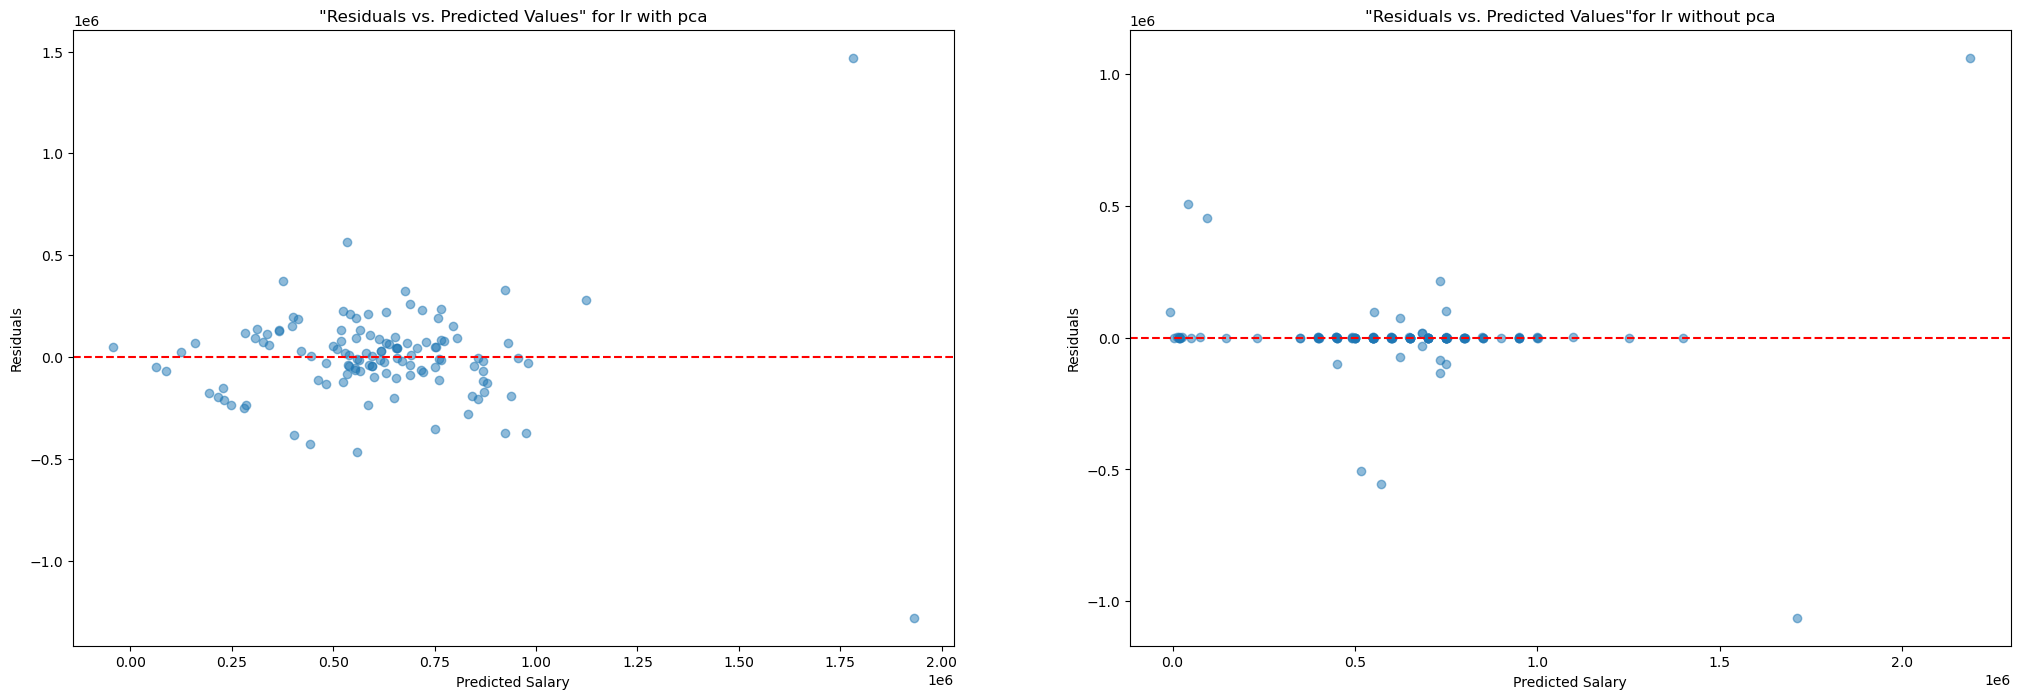

In [35]:
# 1) checking homoscedasticity

residuals_with_pca = ytrain - pred_lr_pca
residuals_without_pca = ytrain - lr_pred

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (25,8))
ax1.scatter(pred_lr_pca, residuals_with_pca, alpha=0.5)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel("Predicted Salary")
ax1.set_ylabel("Residuals")
ax1.set_title('"Residuals vs. Predicted Values" for lr with pca')

ax2.scatter(lr_pred, residuals_without_pca, alpha=0.5)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel("Predicted Salary")
ax2.set_ylabel("Residuals")
ax2.set_title('"Residuals vs. Predicted Values"for lr without pca')

plt.show()

C:\Users\urvas\AppData\Local\Temp\ipykernel_23316\3968056818.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals_with_pca)


<Axes: xlabel='avg_salary', ylabel='Density'>

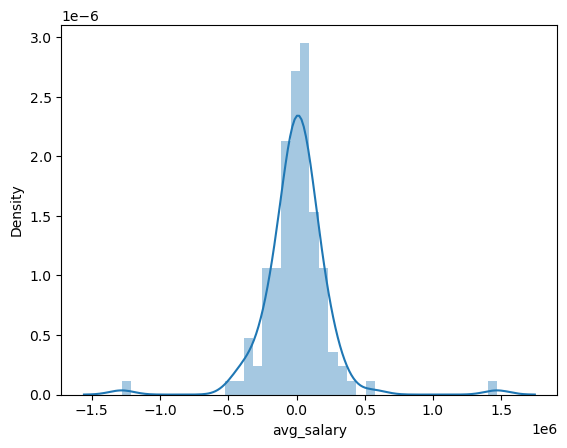

In [36]:
import seaborn as sns
# 2) checking normality of residuals
sns.distplot(residuals_with_pca)

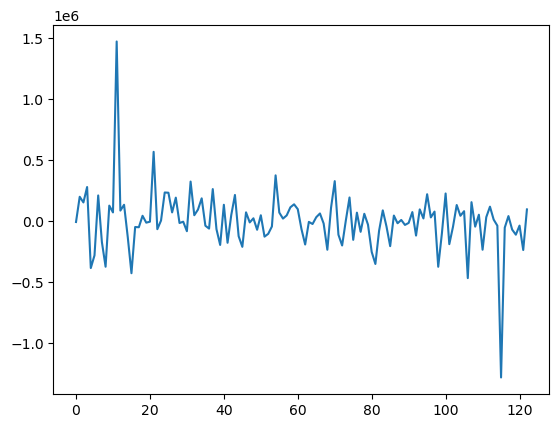

In [37]:
# 3) no autocorrelation of errors
plt.plot(residuals_with_pca)

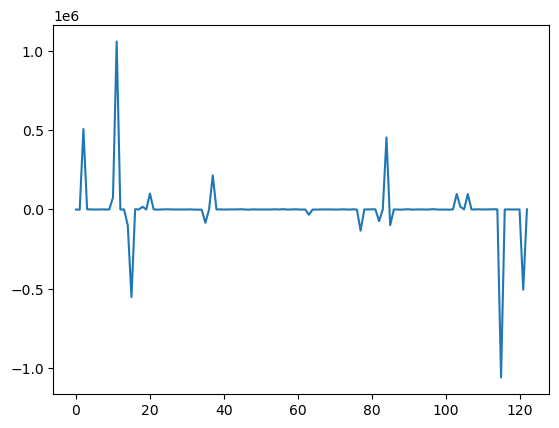

In [38]:
plt.plot(residuals_without_pca) # without pca is somewhat correlated i think 

Key points about VIF scores:
- VIF = 1: No multicollinearity, meaning the predictor is not correlated with other predictors. 
- VIF between 1 and 5: Moderate correlation, usually not a major concern. 
- VIF greater than 5: High multicollinearity, indicating potential issues with coefficient interpretation and stability. 
- VIF greater than 10: Severe multicollinearity, requiring immediate action to address the issue. 

In [39]:
# 4) checking multicollinearity
# on pca data
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(xtrain_pca.shape[1]):
    vif.append(variance_inflation_factor(xtrain_pca, i))
vif

[0.9999999999999998,
 1.0,
 1.0,
 1.0,
 0.9999999999999998,
 1.0,
 1.0,
 1.0000000000000002,
 1.0,
 0.9999999999999998,
 1.0,
 1.0,
 1.0,
 1.0000000000000002,
 1.0,
 0.9999999999999998,
 1.0,
 1.0,
 0.9999999999999998,
 1.0000000000000002,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0000000000000002,
 1.0,
 1.0,
 0.9999999999999998,
 1.0,
 1.0,
 1.0,
 1.0000000000000002,
 1.0000000000000002,
 0.9999999999999998,
 1.0,
 1.0,
 0.9999999999999998,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999998,
 1.0,
 1.0000000000000002,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999998,
 1.0,
 1.0,
 0.9999999999999998]

In [40]:
# 4) checking multicollinearity
# without pca data , normal vale pr
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(xtrain.shape[1]):
    vif.append(variance_inflation_factor(xtrain, i))
vif

D:\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
D:\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


[10.998716302952502,
 102.73170731707262,
 nan,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 nan,
 nan,
 inf,
 inf,
 inf,
 nan,
 inf,
 inf,
 inf,
 nan,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 nan,
 inf,
 nan,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 nan,
 inf,
 inf,
 nan,
 inf,
 nan,
 inf,
 inf,
 nan,
 inf,
 inf,
 nan,
 inf,
 nan,
 inf,
 inf,
 nan,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 nan,
 inf,
 inf,
 inf,
 nan,
 inf,
 inf,
 nan,
 nan,
 inf,
 inf,
 inf,
 inf,
 nan,
 inf,
 inf,
 inf,
 inf,
 inf,
 nan,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 nan,
 inf,
 nan,
 nan,
 nan,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 nan,
 inf,
 nan,
 inf,
 inf,
 inf,
 inf,
 nan,
 nan,
 nan,
 nan,
 inf,
 nan,
 inf,
 inf,
 inf,
 inf,
 nan,
 inf,
 nan,
 inf,
 nan,
 inf,
 inf,
 inf,
 inf,
 nan,
 inf,
 inf,
 inf,
 nan,
 inf,
 inf,
 inf,
 inf,
 inf,
 nan,
 inf,
 nan,
 inf,
 nan,
 nan

In [41]:
xtrain_pca.shape

(123, 61)

In [42]:
xtrain_pca.T[9]

array([ 8.00987391e-01, -4.40591192e-01,  3.87880013e-01, -2.59736334e-02,
        2.80041967e-02, -1.47811120e-01,  3.09411141e-01, -1.59529301e-01,
       -5.04058025e-01,  9.01903218e-01, -6.64122025e-02,  2.41465582e-01,
        6.71294456e-01, -5.46452884e-01,  7.89525266e-01, -6.12580213e-01,
        3.26561047e-01, -9.54875597e-01,  2.66702228e-01, -1.93560141e-01,
       -6.98122900e-01, -1.73433383e-01,  1.22271144e-01, -5.65457938e-01,
       -3.19879891e-01,  4.13686193e-01, -4.63679249e-01,  2.32461329e-01,
       -6.74683592e-01, -6.90461269e-02,  4.12726779e-01, -8.75773607e-03,
       -4.49464960e-01,  8.84439164e-02,  3.16849613e-01, -4.76835254e-01,
       -1.74922372e-01, -4.76835254e-01, -6.05672484e-01,  8.19858200e-01,
        7.86998295e-01, -3.81290933e-02, -3.10110533e-01,  7.27216532e-01,
       -1.75803402e-01, -2.00755537e-01, -2.76007077e-01, -6.52112049e-02,
       -6.15128337e-01, -3.28973621e-01,  3.29107016e-01, -2.50793234e-01,
       -6.40384472e-01,  

In [43]:
xtrain_pca[:,9]

array([ 8.00987391e-01, -4.40591192e-01,  3.87880013e-01, -2.59736334e-02,
        2.80041967e-02, -1.47811120e-01,  3.09411141e-01, -1.59529301e-01,
       -5.04058025e-01,  9.01903218e-01, -6.64122025e-02,  2.41465582e-01,
        6.71294456e-01, -5.46452884e-01,  7.89525266e-01, -6.12580213e-01,
        3.26561047e-01, -9.54875597e-01,  2.66702228e-01, -1.93560141e-01,
       -6.98122900e-01, -1.73433383e-01,  1.22271144e-01, -5.65457938e-01,
       -3.19879891e-01,  4.13686193e-01, -4.63679249e-01,  2.32461329e-01,
       -6.74683592e-01, -6.90461269e-02,  4.12726779e-01, -8.75773607e-03,
       -4.49464960e-01,  8.84439164e-02,  3.16849613e-01, -4.76835254e-01,
       -1.74922372e-01, -4.76835254e-01, -6.05672484e-01,  8.19858200e-01,
        7.86998295e-01, -3.81290933e-02, -3.10110533e-01,  7.27216532e-01,
       -1.75803402e-01, -2.00755537e-01, -2.76007077e-01, -6.52112049e-02,
       -6.15128337e-01, -3.28973621e-01,  3.29107016e-01, -2.50793234e-01,
       -6.40384472e-01,  

In [44]:
xtrain_pca.T[9].shape

(123,)

In [45]:
xtrain_pca[:,9].shape

(123,)

In [46]:
ytrain.shape

(123,)

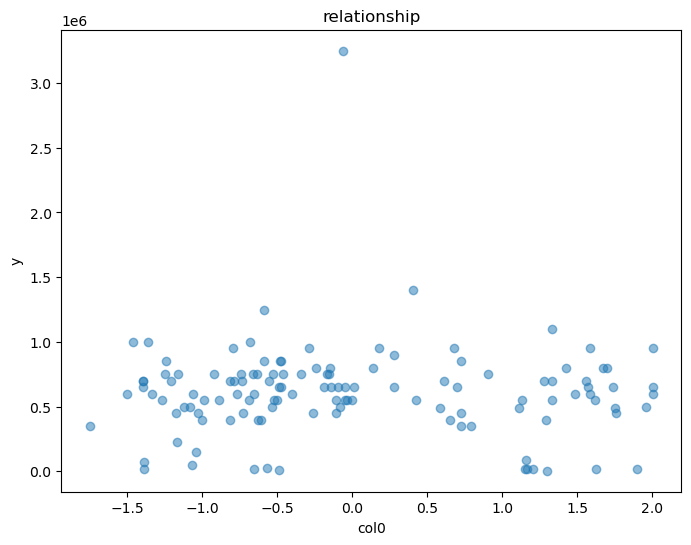

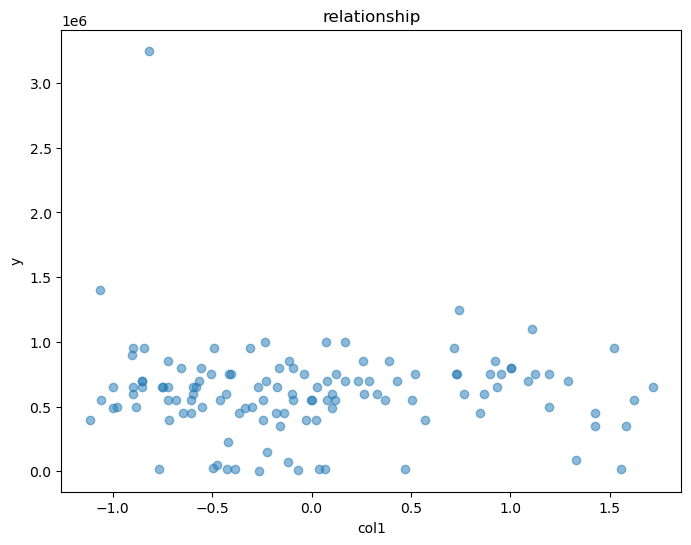

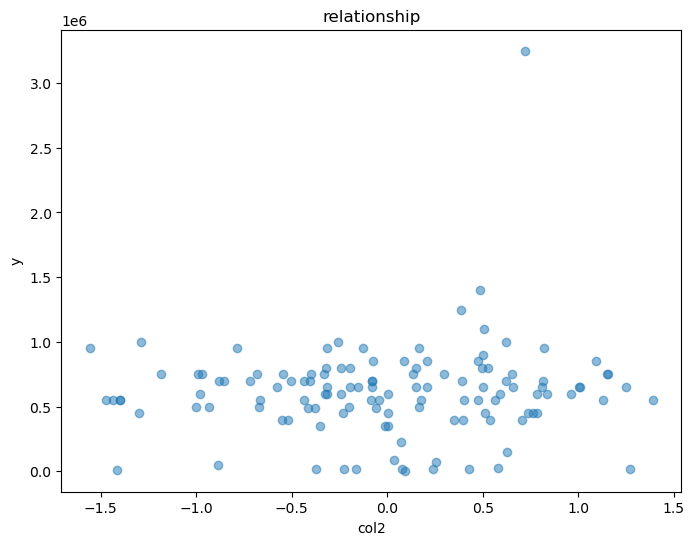

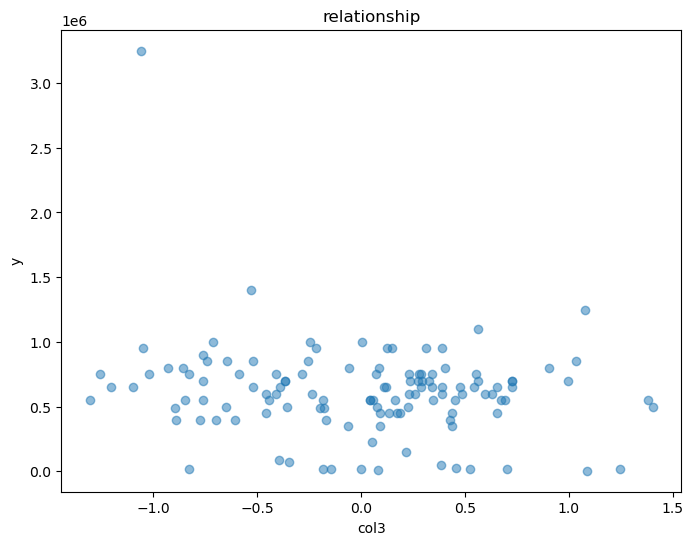

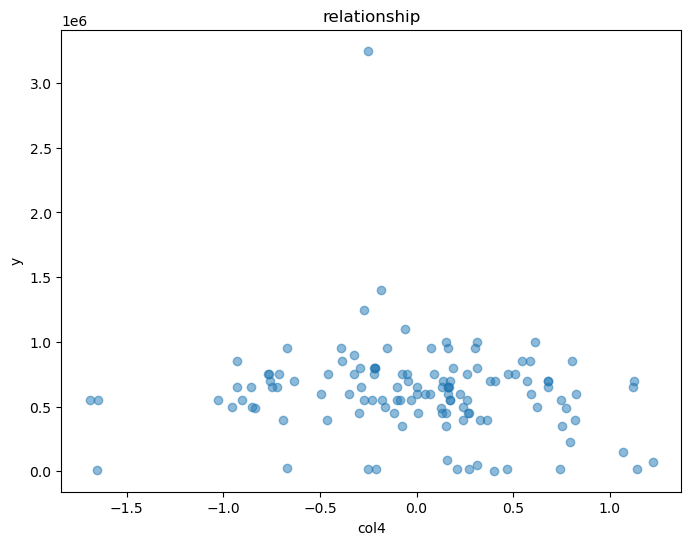

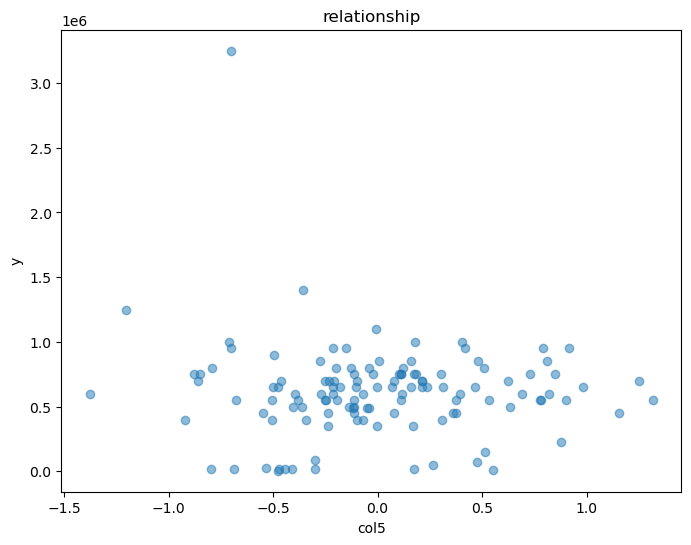

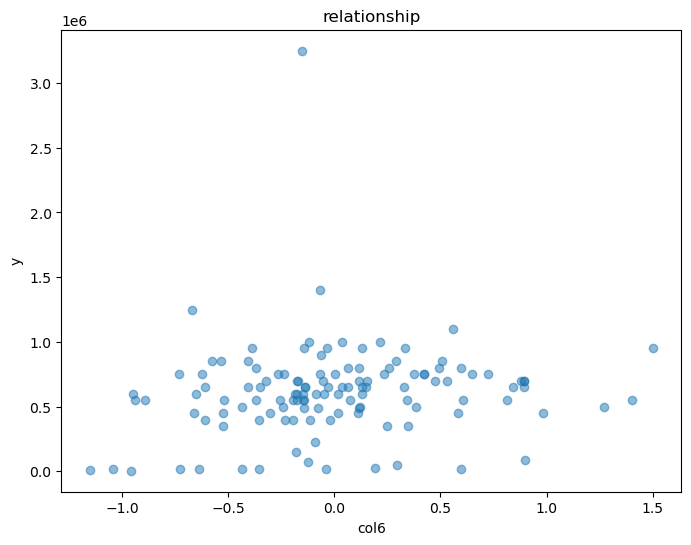

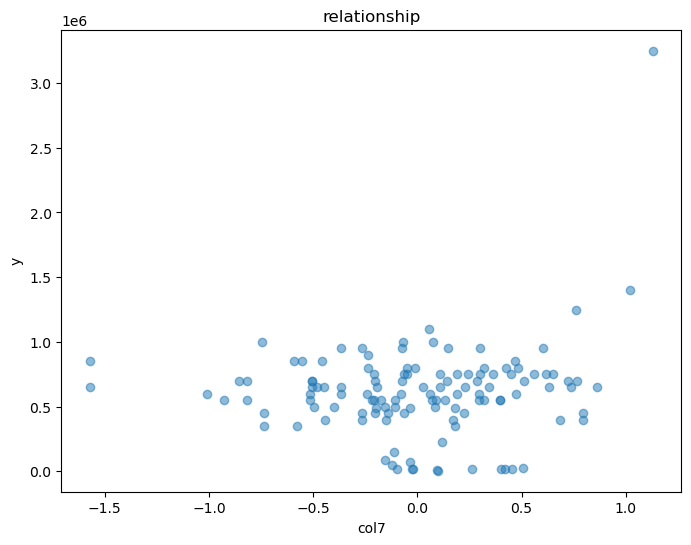

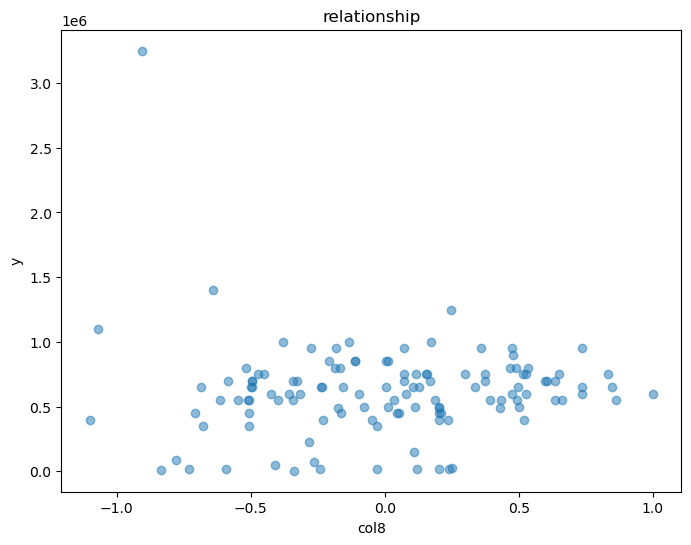

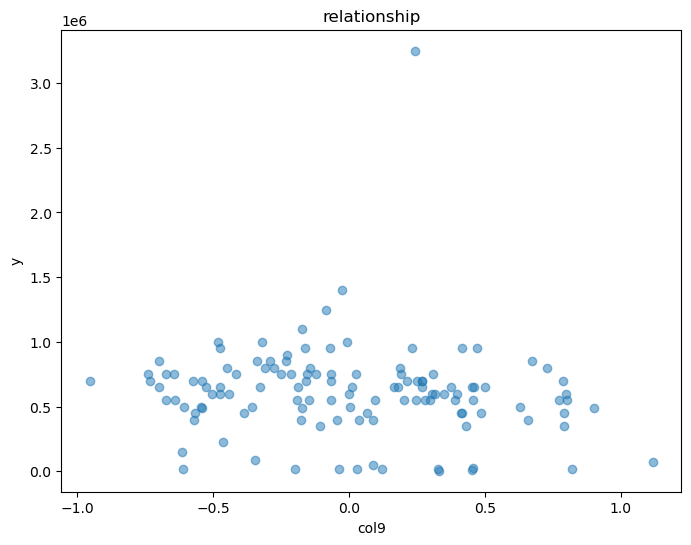

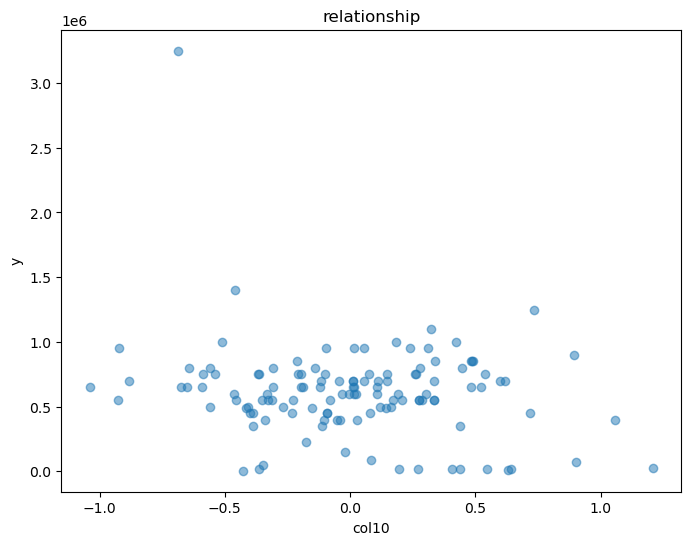

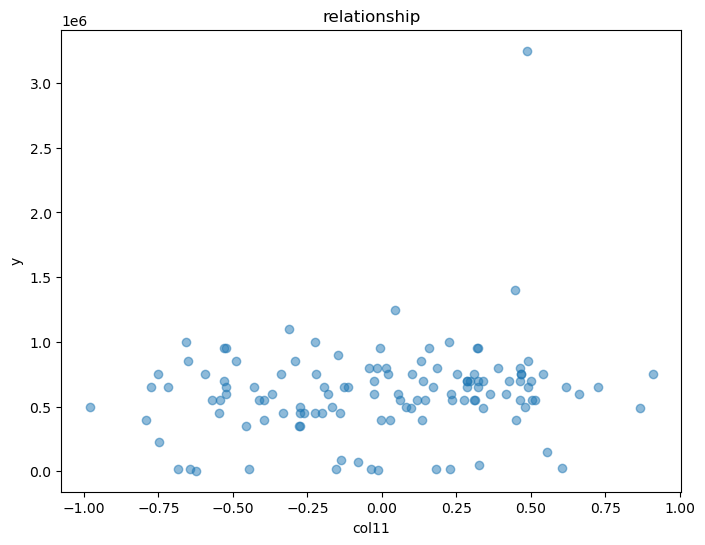

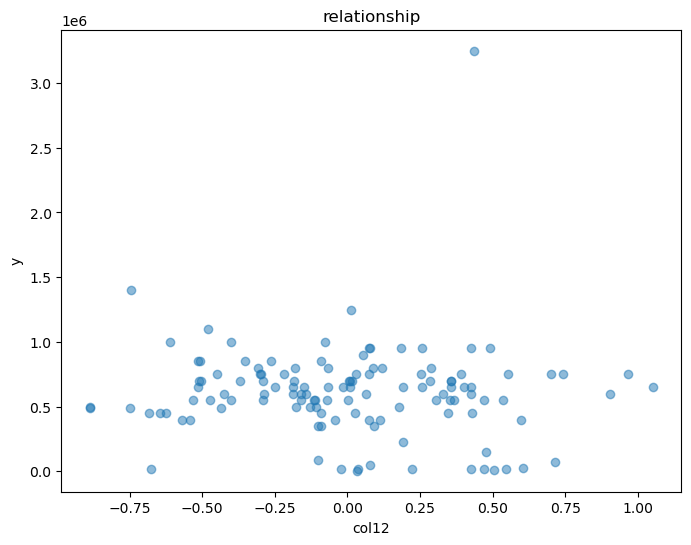

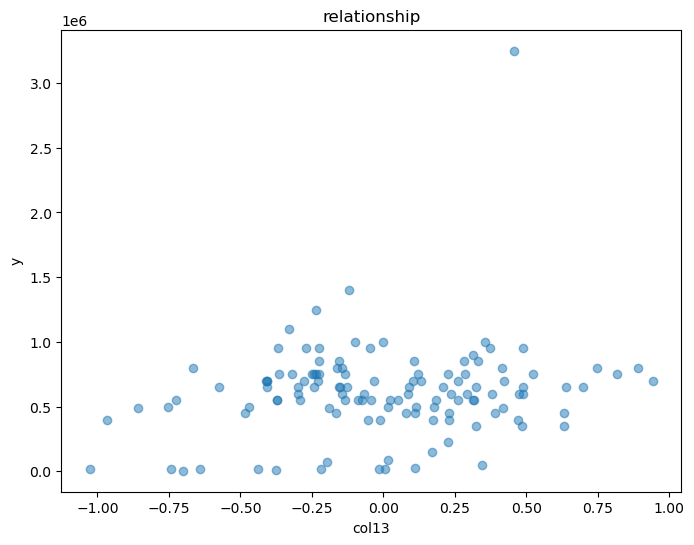

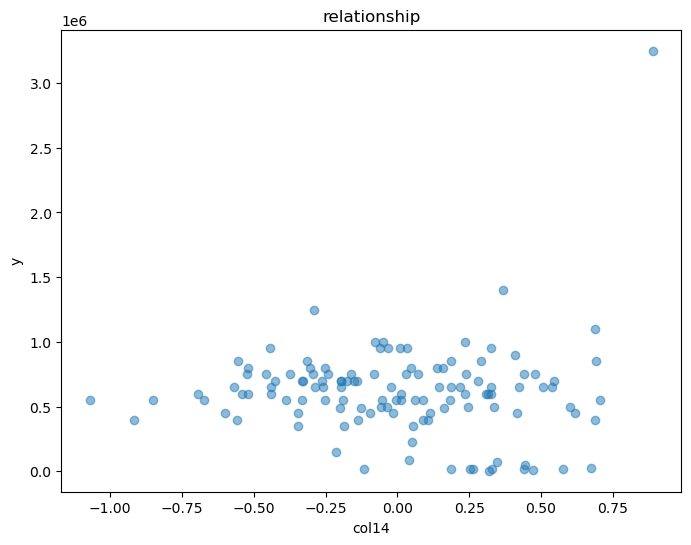

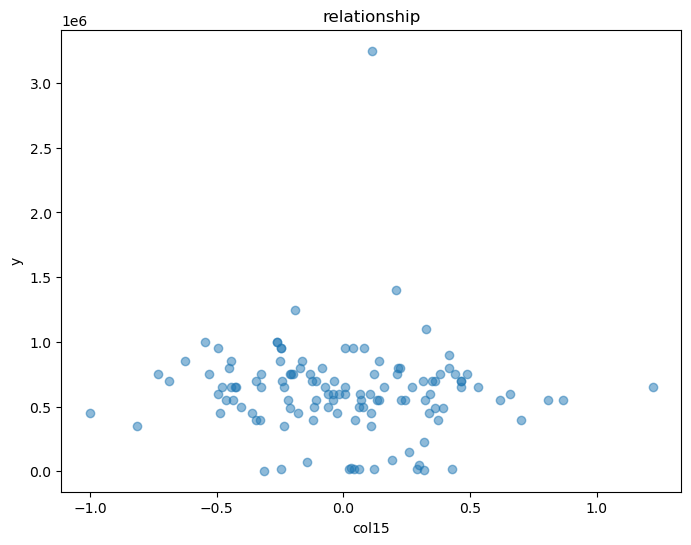

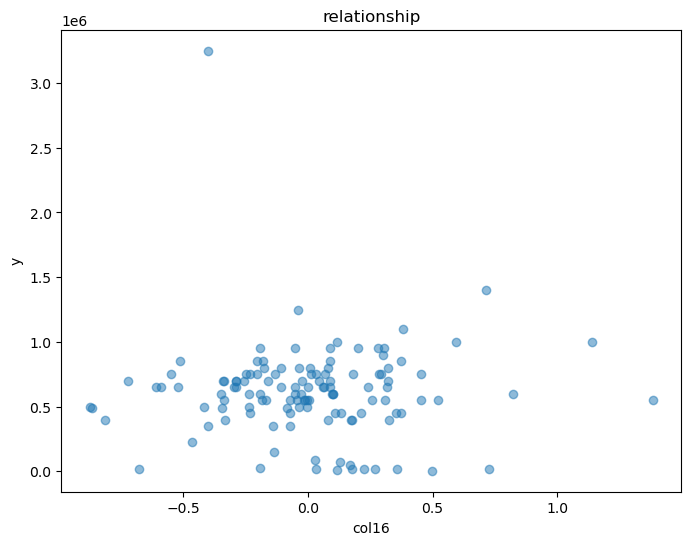

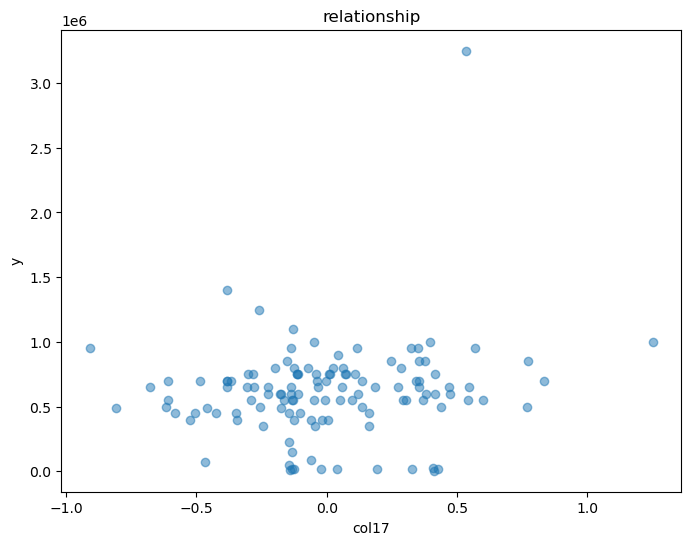

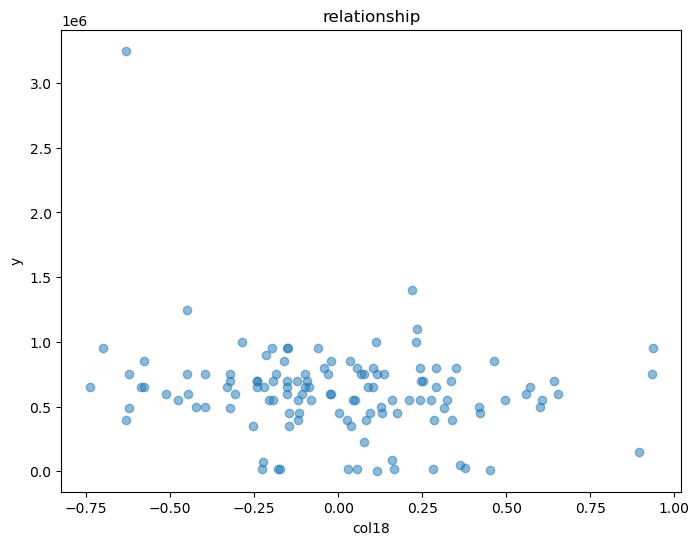

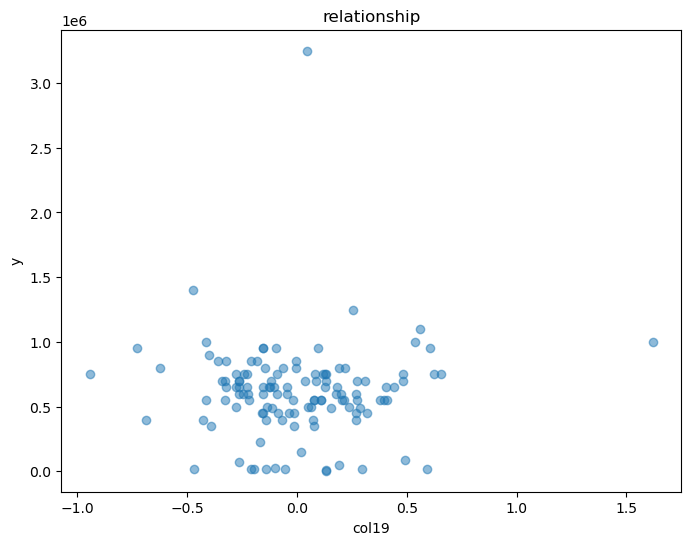

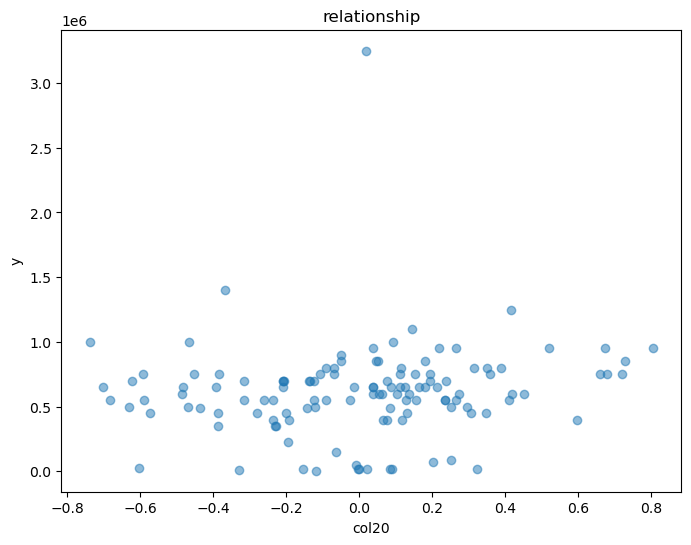

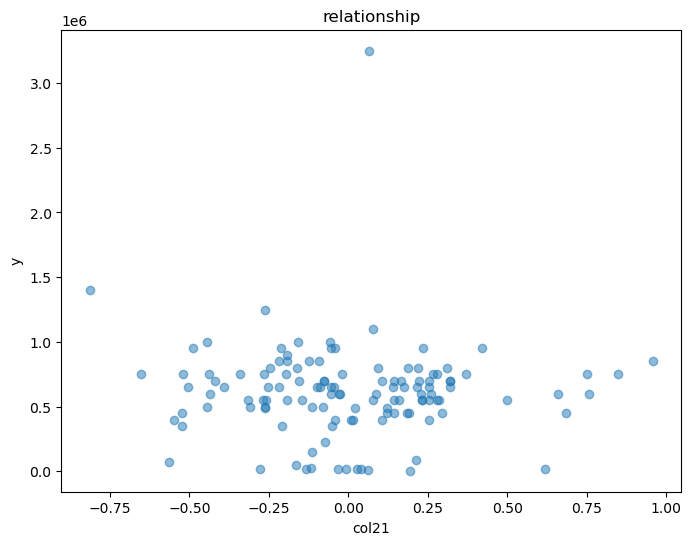

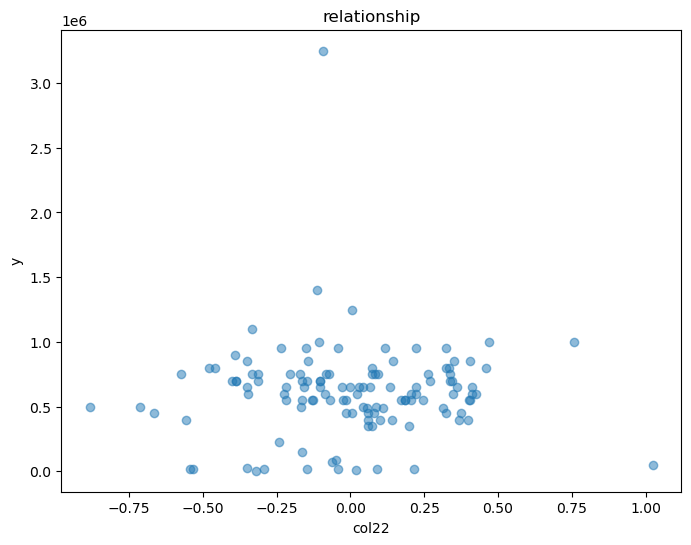

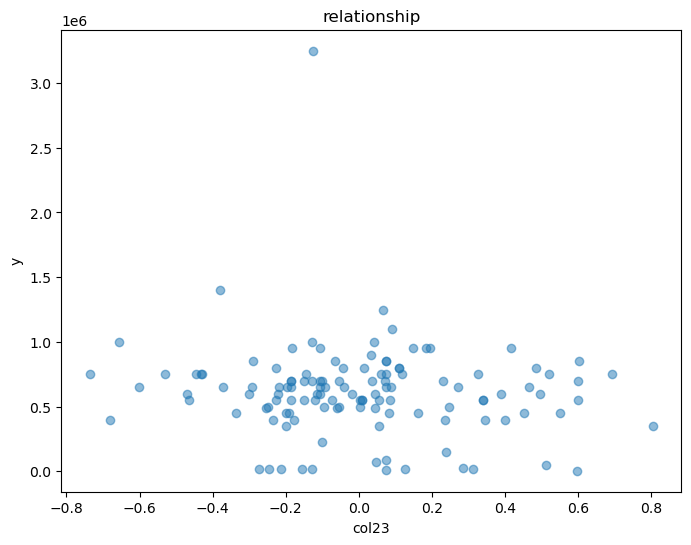

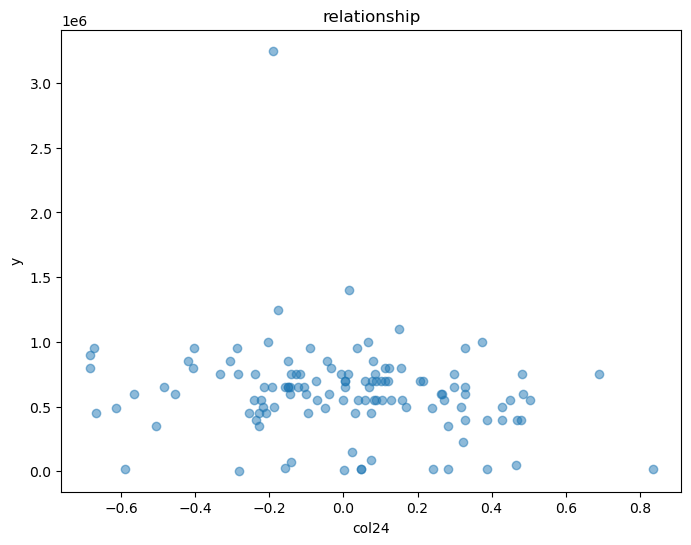

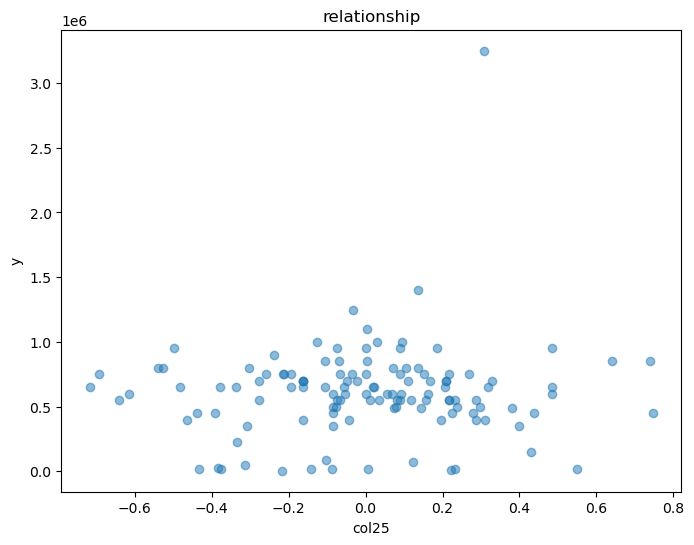

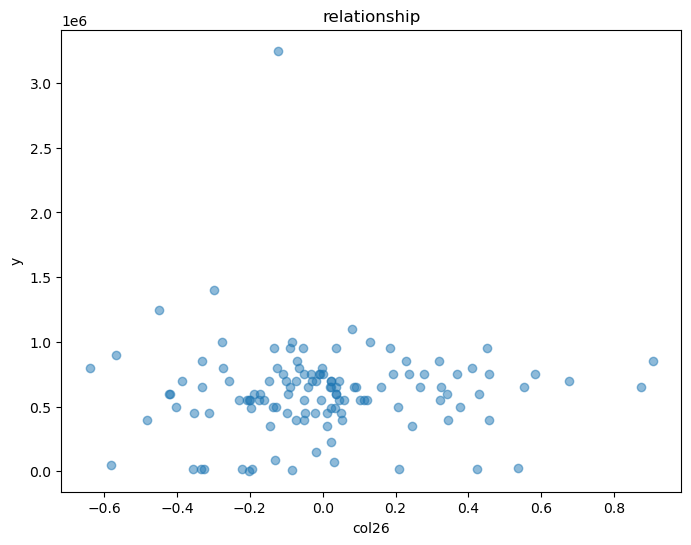

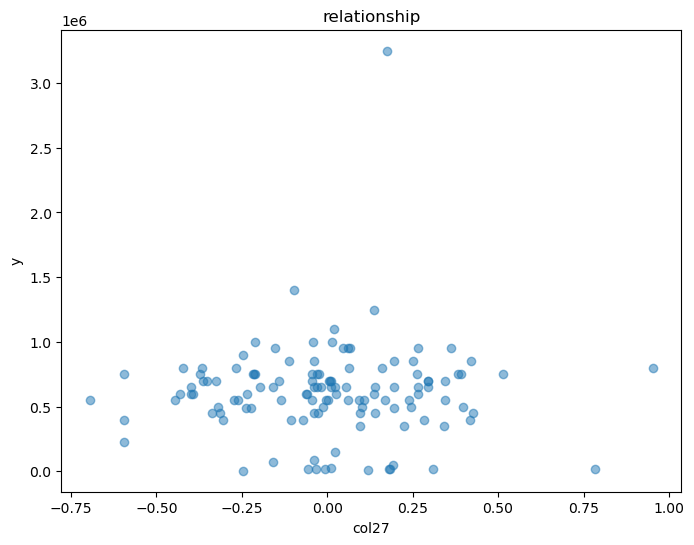

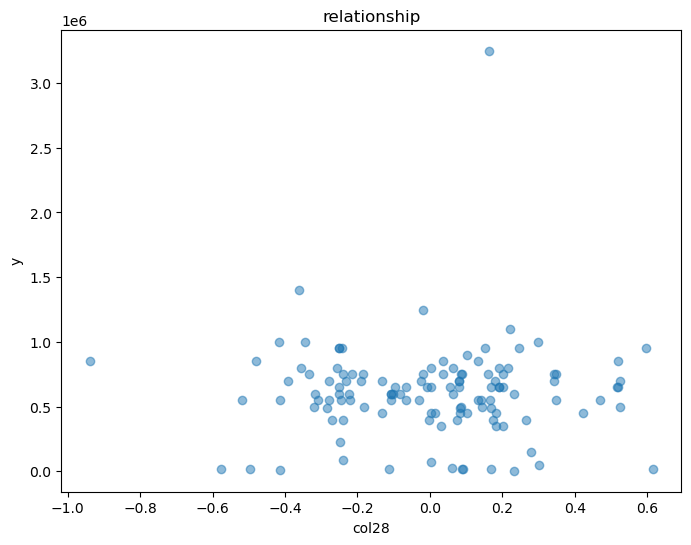

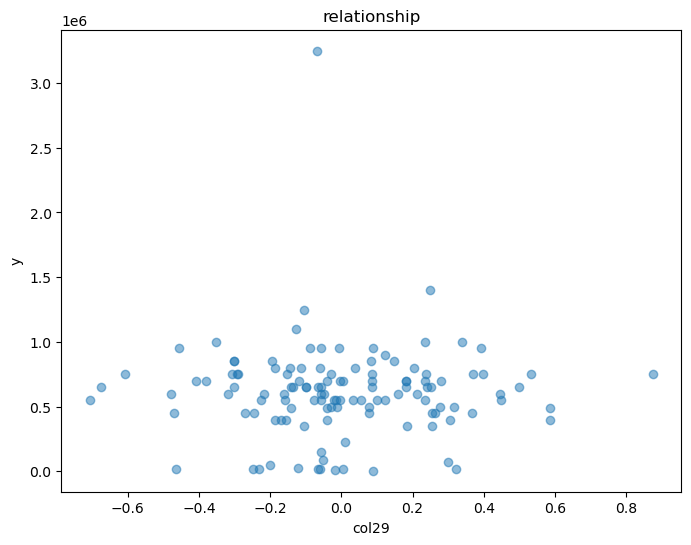

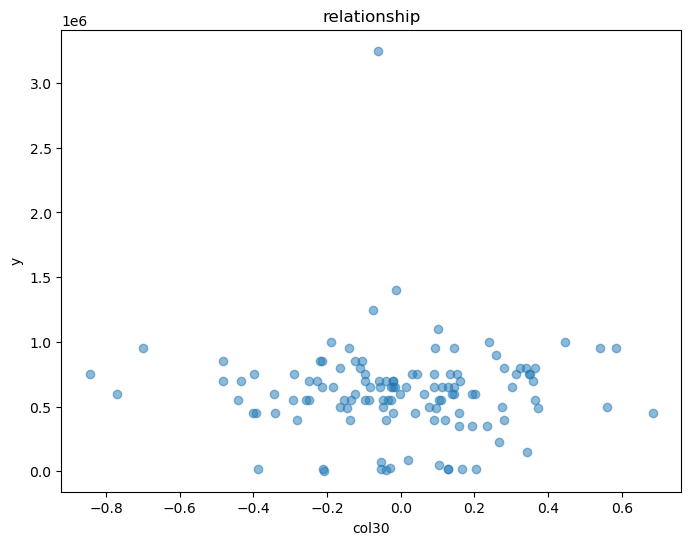

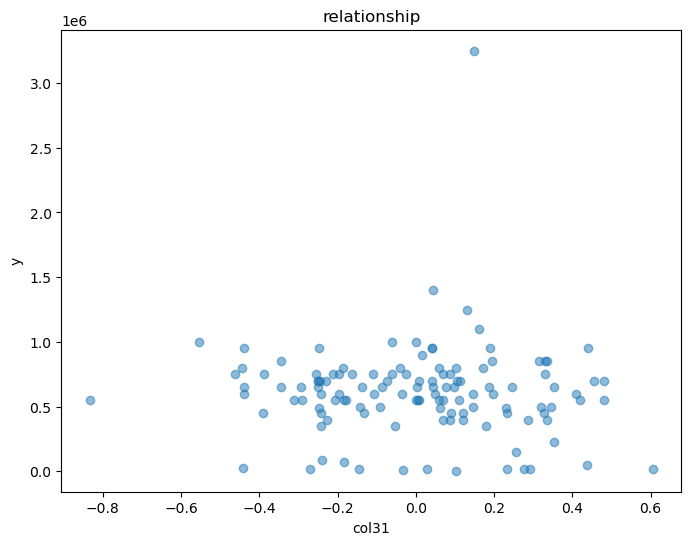

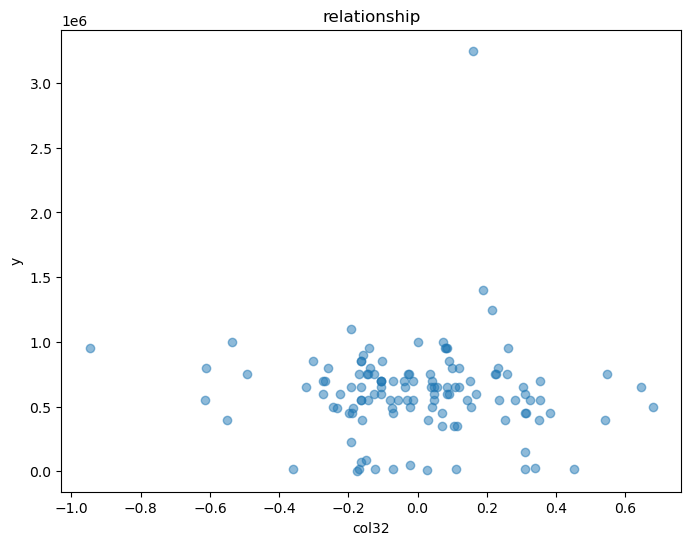

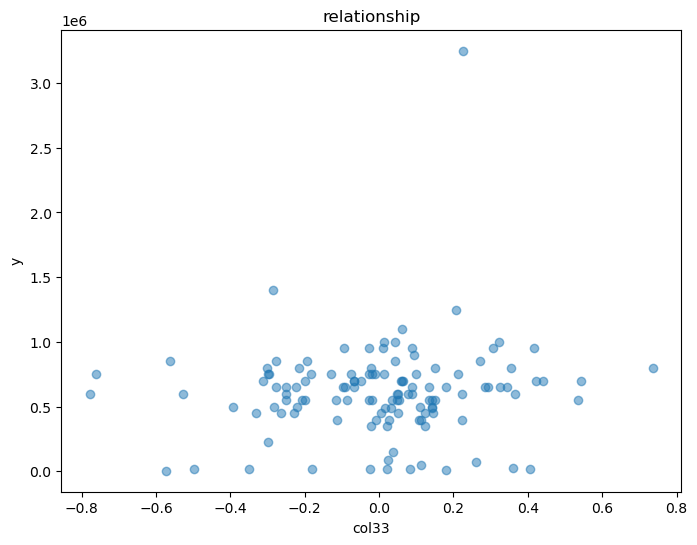

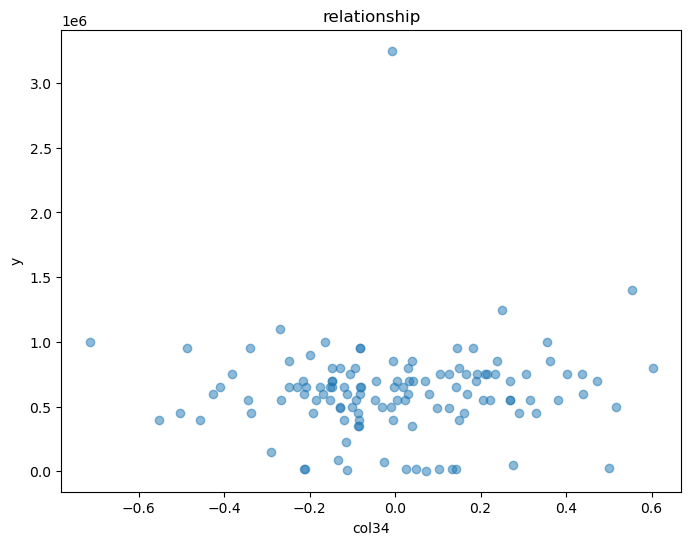

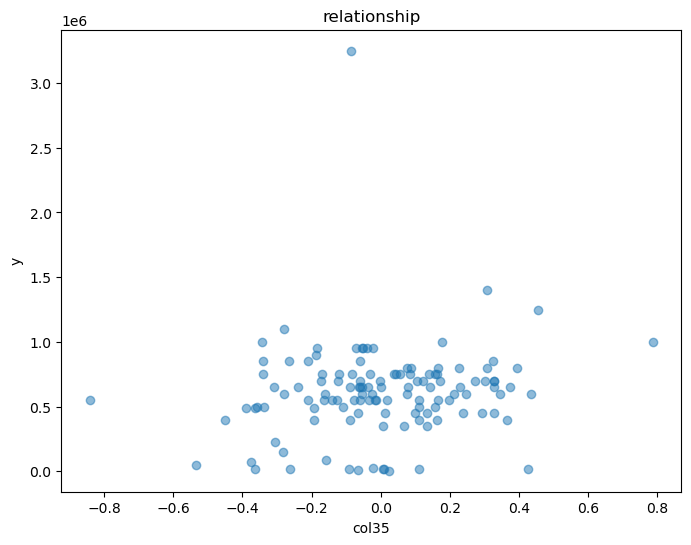

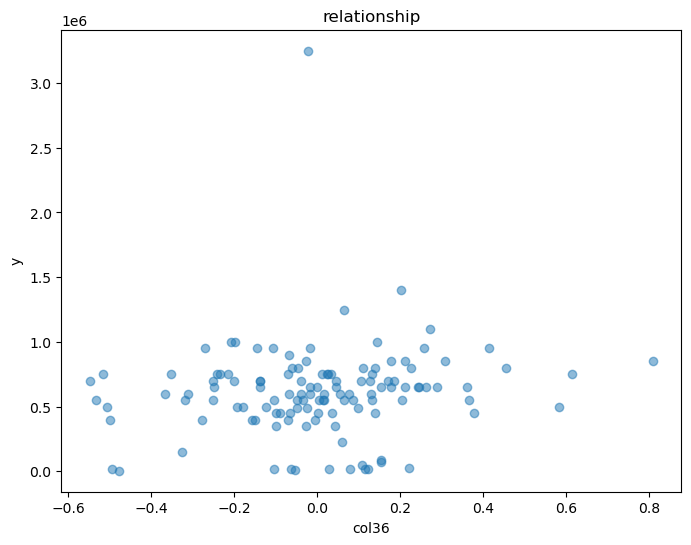

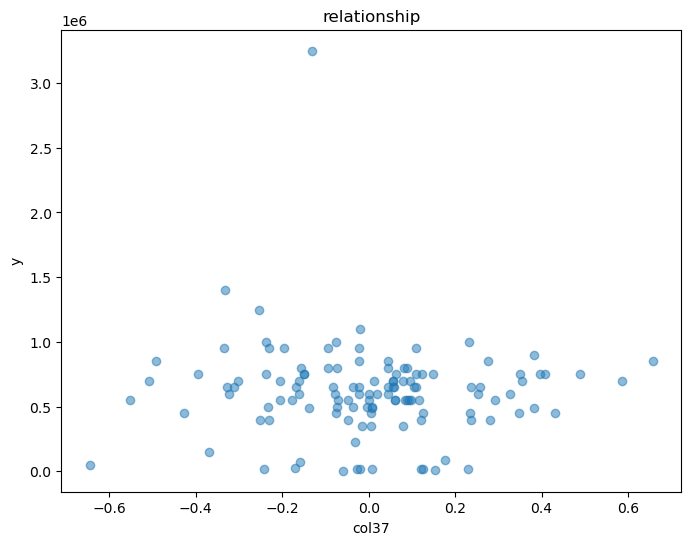

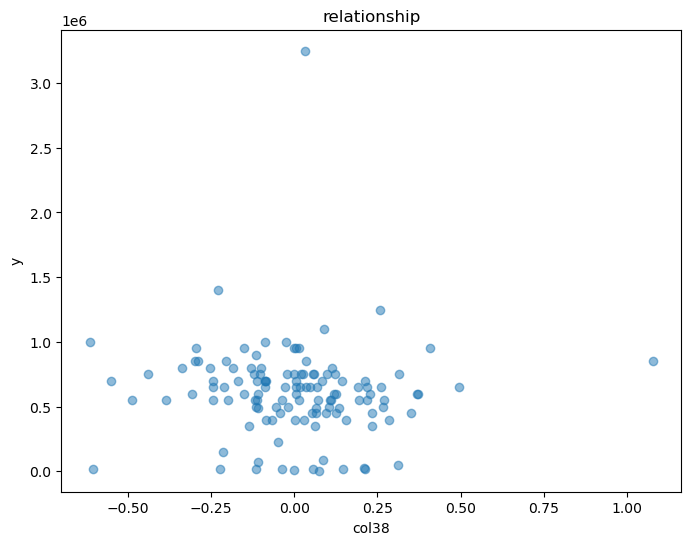

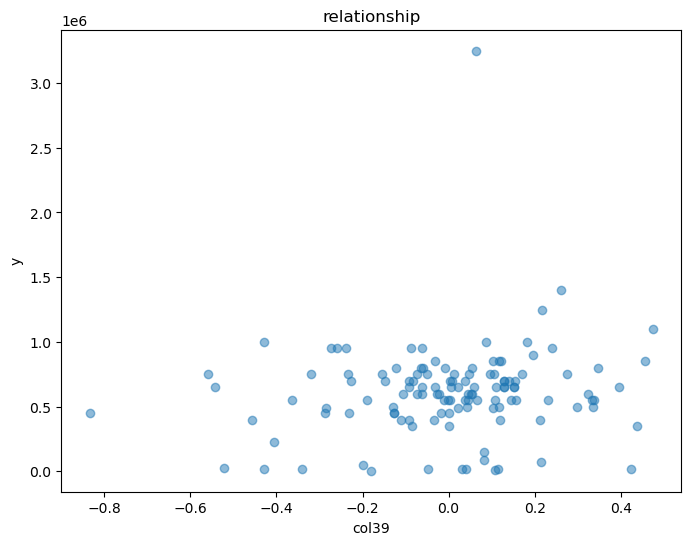

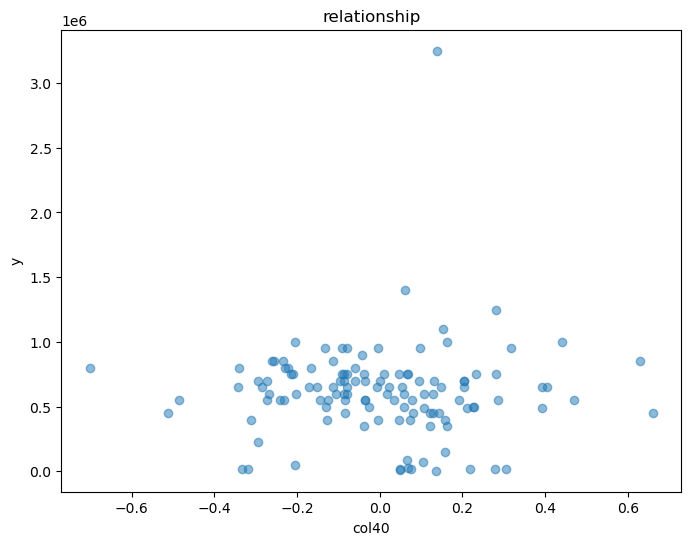

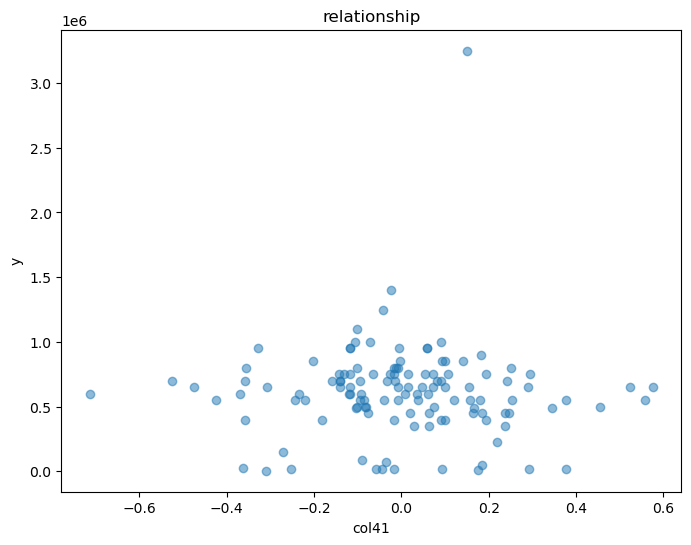

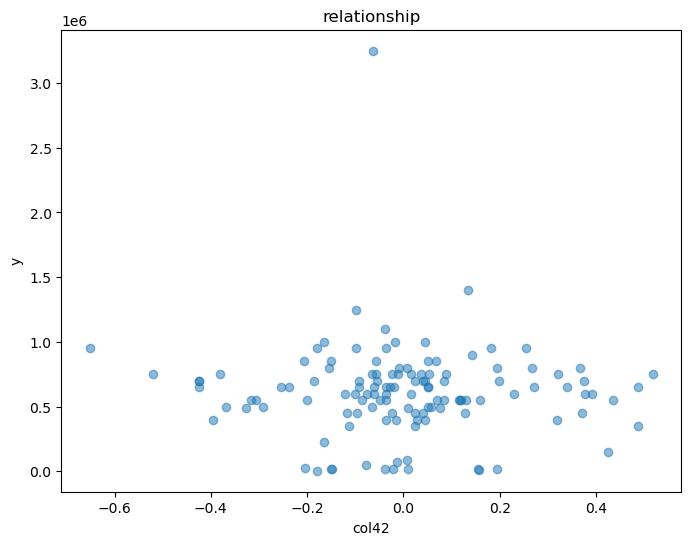

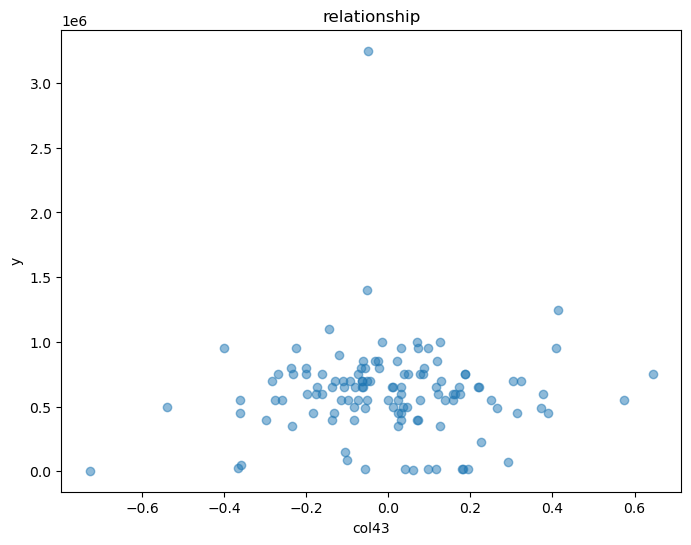

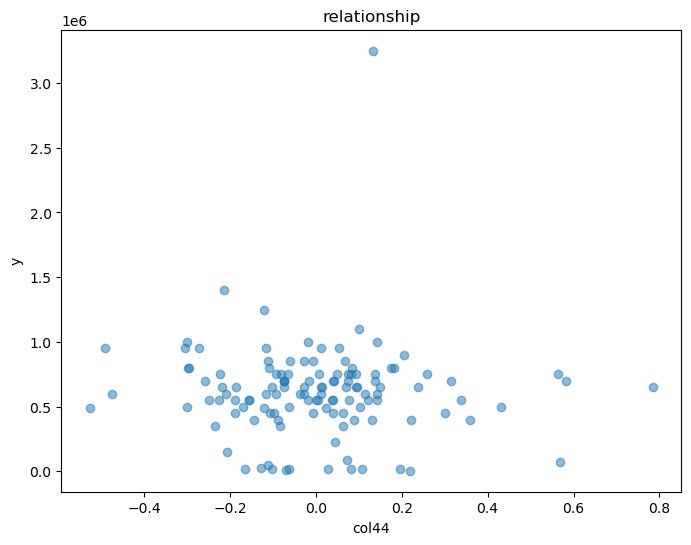

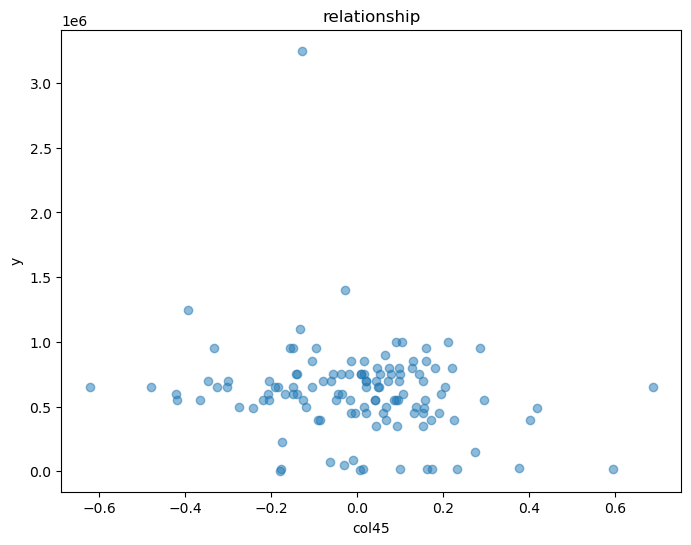

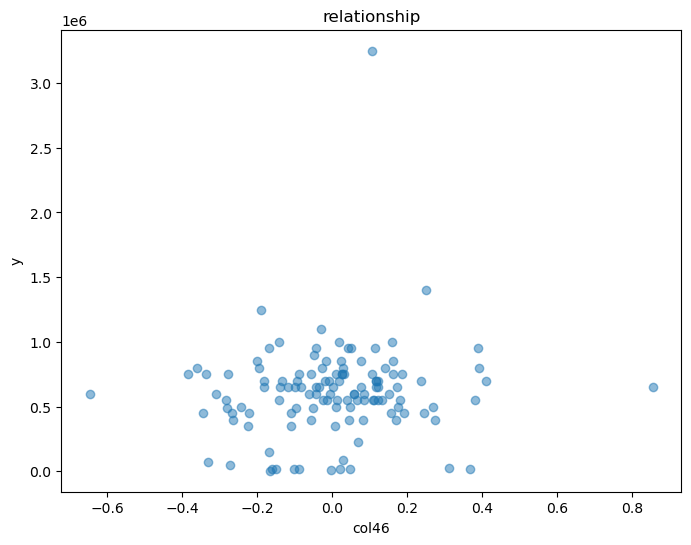

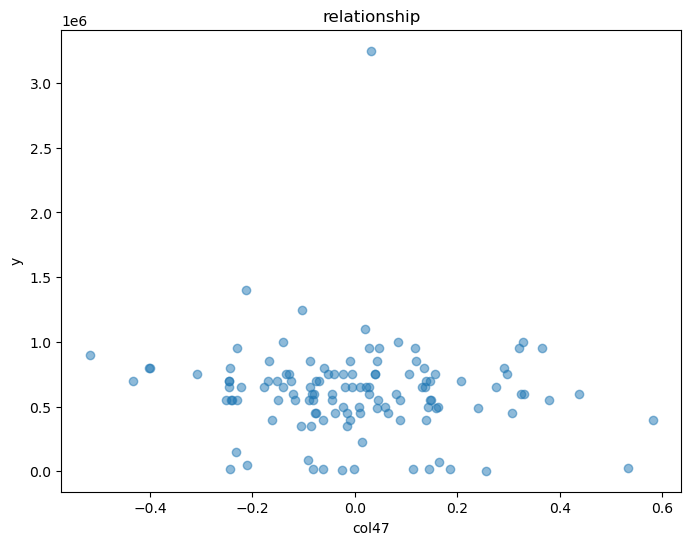

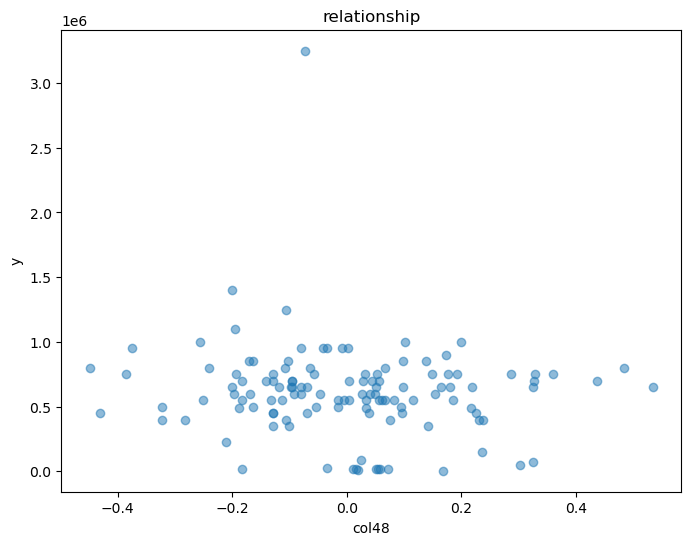

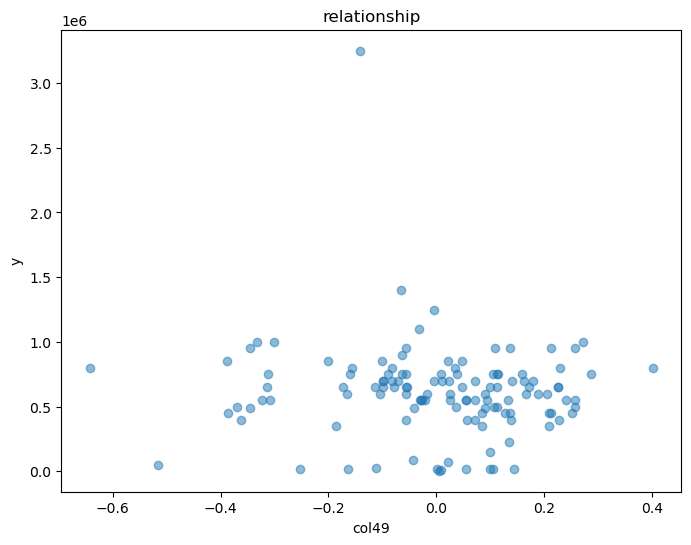

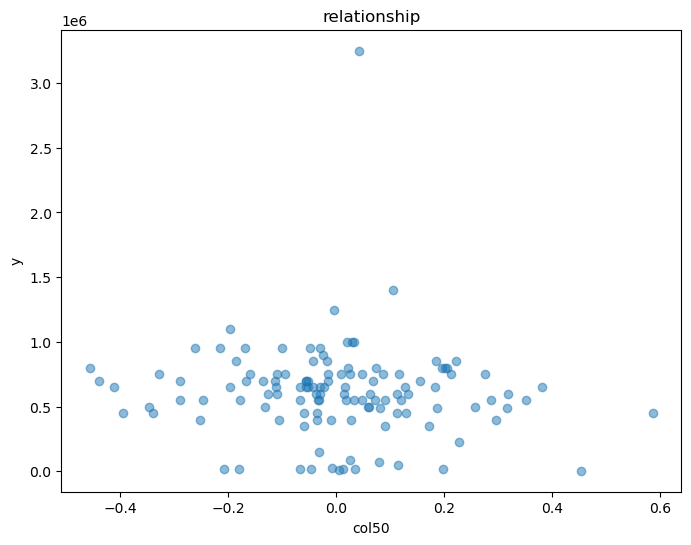

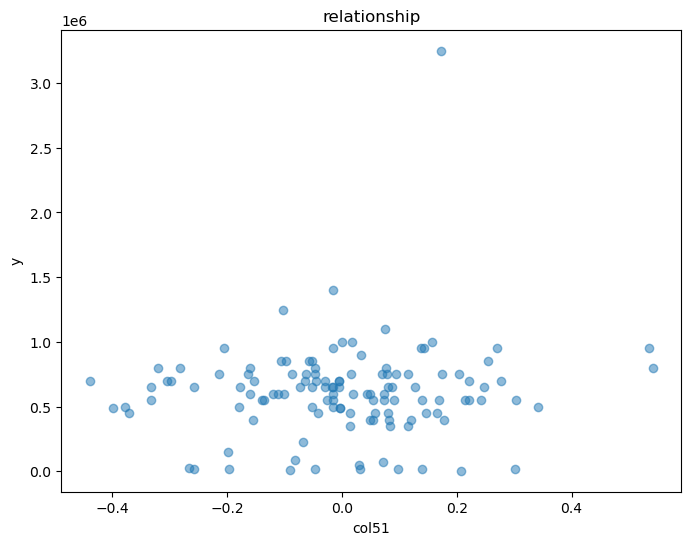

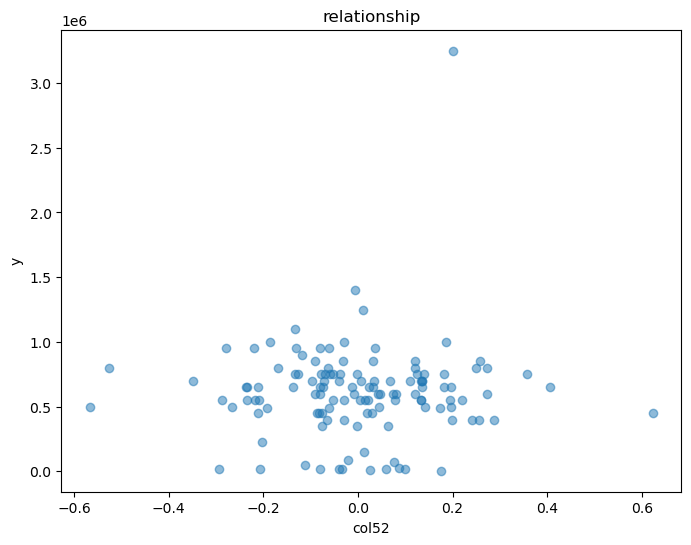

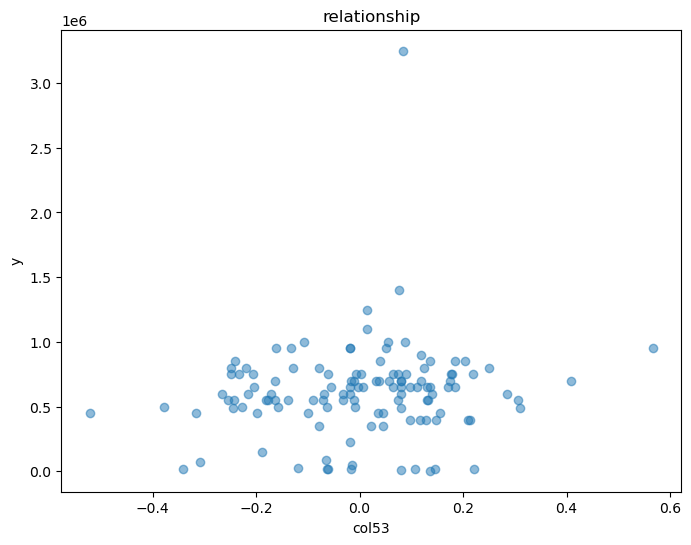

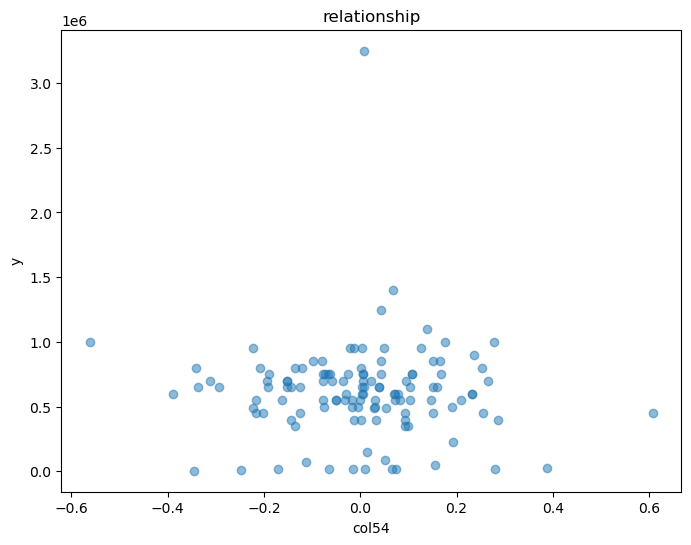

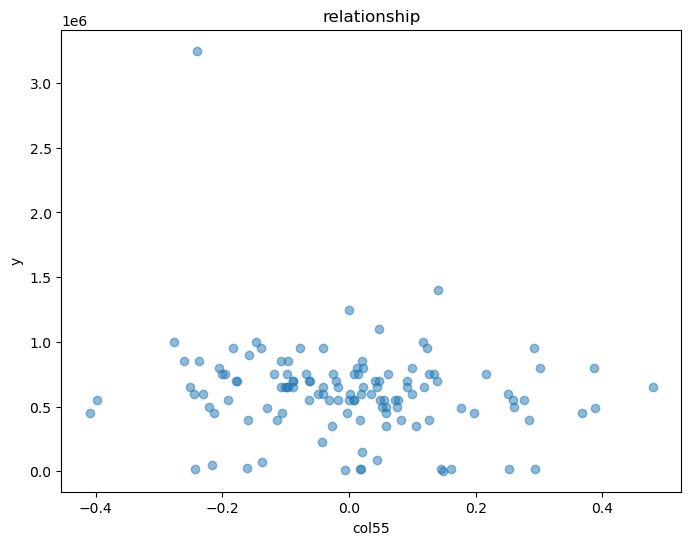

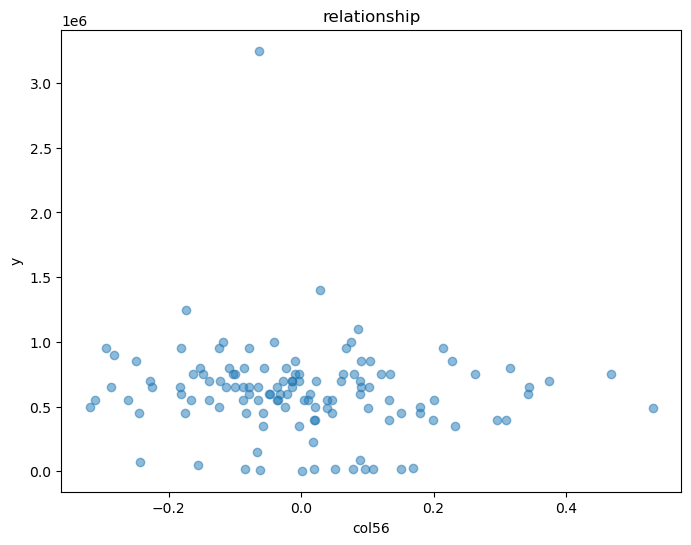

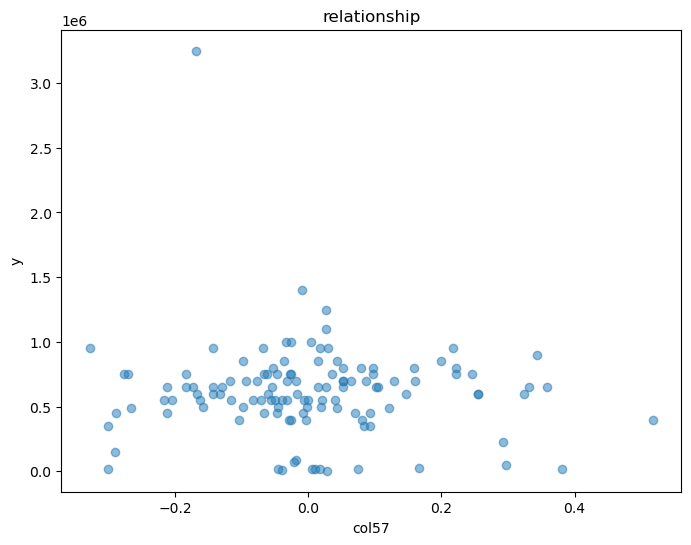

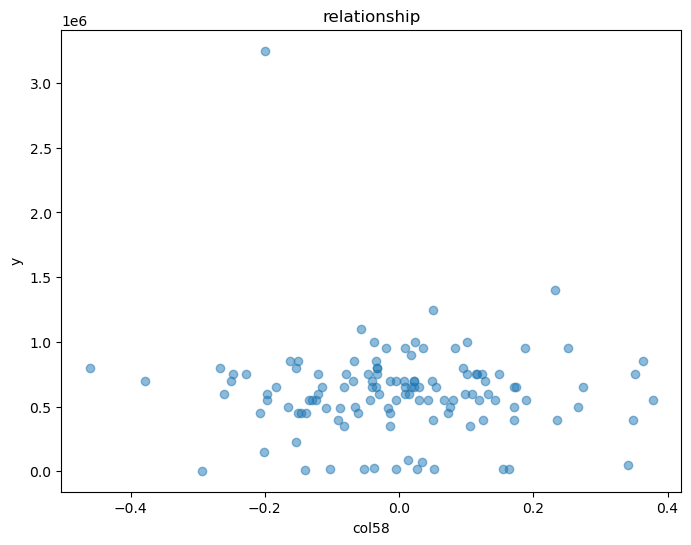

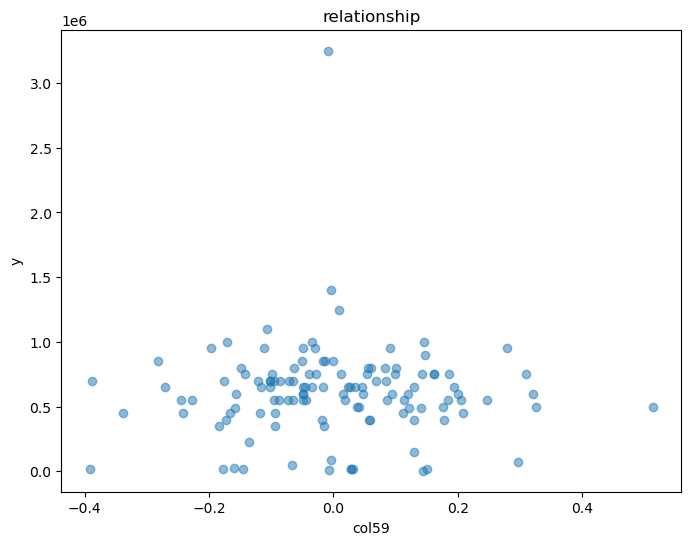

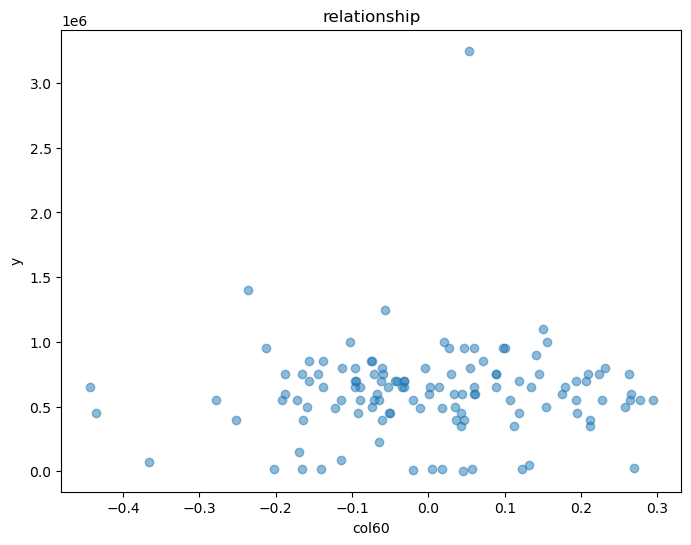

In [47]:
# 5) Linear relationship of all columns with y column
# after pca
for i in range(xtrain_pca.shape[1]):
    plt.figure(figsize = (8,6))
    plt.scatter(xtrain_pca[:,i], ytrain, alpha=0.5)
    plt.xlabel(f"col{i}")
    plt.ylabel("y")
    plt.title('relationship')
    plt.show()

### Trying Lasso Regression

In [51]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.2)
lasso.fit(xtrain_pca,ytrain)
lasso.predict(xtrain_pca)

array([ 558077.5894401 ,  401599.85419736,  397973.1696715 ,
       1121907.67244319,  402472.50561272,  831306.37285267,
        540730.97051389,  872327.9945095 ,  974307.27809699,
        366426.80959464,  629705.57814373, 1780318.90048816,
        764625.58638867,  367071.09680815,  482030.79100135,
        443929.23563187,   63159.49570362,  750982.1001077 ,
        657170.3344884 ,  563461.50163833,  855653.79580425,
        533655.09730863,   86990.62902412,  446179.70887408,
        766578.78869599,  718498.12259849,  159586.3489533 ,
        758574.2432795 ,  766481.57728543,  955478.06820334,
        533437.5956113 ,  677081.61371394,  752618.75734591,
        306215.28172069,  414395.35639497,  688613.83104892,
        554527.30134055,  688613.83104892,  566739.22870761,
        215737.35929168,  567039.13241818,  194202.09358973,
        751691.15522374,  586798.51916047,  524347.24689527,
        231420.4493639 ,  728938.00287649,  761414.78333634,
        125823.55722856,

In [57]:
lasso.coef_

array([-1.18406912e+04, -2.31835802e+04,  3.82021723e+04, -1.10836265e+05,
       -7.31565865e+04, -3.39939698e+04,  9.17753006e+04,  1.17639111e+05,
       -2.92397948e+03, -8.48474801e+04, -1.61564610e+05,  1.42665276e+05,
       -4.65508298e+04,  1.71041944e+05,  3.08012592e+04, -6.22955859e+04,
       -1.31525715e+04,  1.41131295e+05, -2.09228453e+05,  2.33282194e+04,
        1.22881643e+05, -3.75945455e+04,  4.15778493e+04, -1.31909795e+05,
       -2.07940144e+05,  9.55439017e+04,  3.40024200e+04,  1.45010551e+04,
        1.98845088e+03,  1.15895207e+04, -2.24608586e+04, -6.00983963e+04,
       -5.50168315e+04,  1.35128054e+05,  6.00108244e+04,  2.05217815e+05,
        1.74994667e+05, -5.65176681e+04, -7.65644554e+04,  2.19471002e+05,
       -9.13592928e+01, -1.63126483e+04, -6.15274513e+04,  5.82251264e+04,
       -6.54234960e+04, -3.15070571e+05,  1.83010974e+05, -1.52514028e+05,
       -2.20905332e+05, -1.26916078e+05, -1.51658418e+05,  1.86236457e+05,
        8.98539320e+04,  

Key Takeaways
- Negative Lasso coefficients ≠ bad 🚫
- They simply indicate inverse relationships
- Zero coefficients = irrelevant features removed

In [61]:
evaluate(xtrain_pca, ytrain, Lasso())

Cross-validation r2 scores: [-0.5144896718006129, -1.6746384618945283, -0.8505999944881897, -9.951466530376136, -2.6299533896133536]
Average r2 score: -3.124229609634564
Cross-validation MAE scores: [439485.2536732587, 359043.4020250147, 346644.758621993, 535378.1232102524, 345737.4164861766]
Average MAE: 405257.79080333904
Cross-validation MSE scores: [504044213744.8654, 202730647770.73663, 185231806191.34726, 709046307400.4862, 171626803714.4175]
Average MSE: 354535955764.3706
Cross-validation RMSE scores: [709960.7128178752, 450256.20236787037, 430385.6482172091, 842048.8747100647, 414278.6546690736]
Average RMSE: 569386.0185564186


In [86]:
# model ols summary results without pca 
import statsmodels.api as sm
model = sm.OLS(ytrain, xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                 -1.628
Method:                 Least Squares   F-statistic:                    0.3252
Date:                Tue, 11 Feb 2025   Prob (F-statistic):              0.998
Time:                        15:52:17   Log-Likelihood:                -1653.5
No. Observations:                 123   AIC:                             3533.
Df Residuals:                      10   BIC:                             3851.
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
employer_estimate                        4.761e+05   4.65e+05      1.024      0.330   -5.59e+05    1.51e+06
seniority                                    1e+05   8.27e+05      0.121      0.906   -1.74e+06    1.94e+06
.net                                    -7.143e-07   1.53e-06     -0.467      0.650   -4.12e-06    2.69e-06
adobe creative suite                    -3.506e+06   7.54e+06     -0.465      0.652   -2.03e+07    1.33e+07
agile                                   -7.454e+05   1.21e+06     -0.616      0.552   -3.44e+06    1.95e+06
ai                                      -8.054e+05   1.96e+06     -0.410      0.690   -5.18e+06    3.57e+06
alteryx                                  2.344e+06   6.01e+06      0.390      0.705    -1.1e+07    1.57e+07
analysis skills                         -1.316e+06   2.87e+06     -0.458      0.657   -7.71e+06    5.08e+06
analytics                                 -4.6e+06   8.77e+06     -0.524      0.611   -2.41e+07    1.49e+07
android                                 -1.463e+06   3.13e+06     -0.467      0.650   -8.44e+06    5.51e+06
angular                                  2.284e+05   5.75e+05      0.397      0.700   -1.05e+06    1.51e+06
apache hive                             -4.717e+06   9.62e+06     -0.490      0.634   -2.61e+07    1.67e+07
apis                                     1.312e+06   2.87e+06      0.458      0.657   -5.07e+06     7.7e+06
application development                 -3.657e+06   7.85e+06     -0.466      0.651   -2.11e+07    1.38e+07
arcgis                                   2.072e+06   6.14e+06      0.337      0.743   -1.16e+07    1.58e+07
asp.net                                 -1.621e+06   3.05e+06     -0.532      0.606   -8.41e+06    5.17e+06
asset management                         3.859e-07   8.36e-07      0.462      0.654   -1.48e-06    2.25e-06
authentication                          -3.782e-07   8.55e-07     -0.442      0.668   -2.28e-06    1.53e-06
aws                                     -1.157e+06   2.87e+06     -0.403      0.695   -7.55e+06    5.24e+06
azure                                   -1.057e+06   1.96e+06     -0.538      0.602   -5.43e+06    3.32e+06
big data                                -1.209e+05   7.37e+05     -0.164      0.873   -1.76e+06    1.52e+06
bloomberg                               -6.551e-07    1.4e-06     -0.469      0.649   -3.77e-06    2.46e-06
bootstrap                                2.133e+06   6.16e+06      0.346      0.736   -1.16e+07    1.59e+07
business analysis                       -1.635e+06   5.05e+06     -0.324      0.753   -1.29e+07    9.63e+06
business intelligence                   -1.569e+05   1.05e+06     -0.149      0.885    -2.5e+06    2.19e+06
business requirements                    9.877e-07   2.15e-

In [88]:
# model ols summary results after pca 
model = sm.OLS(ytrain, xtrain_pca).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             avg_salary   R-squared (uncentered):                   0.141
Model:                            OLS   Adj. R-squared (uncentered):             -0.703
Method:                 Least Squares   F-statistic:                             0.1673
Date:                Tue, 11 Feb 2025   Prob (F-statistic):                        1.00
Time:                        15:52:27   Log-Likelihood:                         -1822.2
No. Observations:                 123   AIC:                                      3766.
Df Residuals:                      62   BIC:                                      3938.
Df Model:                          61                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.184e+04   8.06e+04     -0.147      0.884   -1.73e+05    1.49e+05
x2         -2.318e+04   1.16e+05     -0.200      0.842   -2.55e+05    2.09e+05
x3           3.82e+04   1.23e+05      0.312      0.756   -2.07e+05    2.83e+05
x4         -1.108e+05    1.4e+05     -0.789      0.433   -3.91e+05     1.7e+05
x5         -7.316e+04   1.46e+05     -0.500      0.619   -3.66e+05    2.19e+05
x6         -3.399e+04   1.63e+05     -0.208      0.836    -3.6e+05    2.92e+05
x7          9.178e+04   1.65e+05      0.555      0.581   -2.39e+05    4.22e+05
x8          1.176e+05   1.75e+05      0.674      0.503   -2.31e+05    4.67e+05
x9         -2924.9518   1.84e+05     -0.016      0.987   -3.71e+05    3.65e+05
x10        -8.485e+04   1.88e+05     -0.451      0.654   -4.61e+05    2.92e+05
x11        -1.616e+05   1.98e+05     -0.816      0.418   -5.57e+05    2.34e+05
x12         1.427e+05   2.02e+05      0.705      0.483   -2.62e+05    5.47e+05
x13        -4.655e+04   2.08e+05     -0.224      0.823   -4.62e+05    3.69e+05
x14          1.71e+05   2.14e+05      0.801      0.426   -2.56e+05    5.98e+05
x15          3.08e+04    2.2e+05      0.140      0.889   -4.09e+05    4.71e+05
x16         -6.23e+04   2.28e+05     -0.273      0.786   -5.19e+05    3.94e+05
x17        -1.315e+04   2.33e+05     -0.056      0.955   -4.79e+05    4.53e+05
x18         1.411e+05   2.35e+05      0.601      0.550   -3.28e+05     6.1e+05
x19        -2.092e+05   2.43e+05     -0.862      0.392   -6.95e+05    2.76e+05
x20         2.333e+04   2.53e+05      0.092      0.927   -4.83e+05    5.29e+05
x21         1.229e+05   2.54e+05      0.483      0.631   -3.86e+05    6.31e+05
x22         -3.76e+04   2.65e+05     -0.142      0.888   -5.67e+05    4.92e+05
x23         4.158e+04   2.75e+05      0.151      0.880   -5.09e+05    5.92e+05
x24        -1.319e+05    2.8e+05     -0.471      0.639   -6.92e+05    4.28e+05
x25        -2.079e+05   2.82e+05     -0.737      0.464   -7.72e+05    3.56e+05
x26         9.555e+04    2.9e+05      0.330      0.743   -4.84e+05    6.75e+05
x27         3.401e+04      3e+05      0.113      0.910   -5.66e+05    6.34e+05
x28          1.45e+04   3.05e+05      0.048      0.962   -5.95e+05    6.24e+05
x29         1991.1463   3.06e+05      0.006      0.995   -6.11e+05    6.15e+05
x30         1.159e+04   3.13e+05      0.037      0.971   -6.14e+05    6.37e+05
x31        -2.246e+04   3.17e+05     -0.071      0.944   -6.55e+05    6.11e+05
x32         -6.01e+04   3.23e+05     -0.186      0.853   -7.06e+05    5.86e+05
x33        -5.502e+04   3.29e+05     -0.167      0.868   -7.13e+05    6.03e+05
x34         1.351e+05    3.3e+05      0.410      0.683   -5.24e+05    7.94e+05
x35         6.001e+04   3.42e+05      0.176      0.861   -6.2

##### explanation of ols summary 
R-squared (uncentered) = 0.006
→ The model explains almost 0% of the variance in avg_salary.

Adjusted R-squared = -0.019
→ Even worse than the raw R², meaning the model does not generalize well.

F-statistic = 0.2543, p-value = 0.858
→ Very high p-value (>> 0.05), meaning the model is not statistically significant.

Coefficients and P-values

All three features have large p-values (>> 0.05).
This suggests that none of them are significant predictors of avg_salary.
Durbin-Watson = 0.522

A low Durbin-Watson statistic (<1.5) suggests autocorrelation, meaning the residuals are not independent.
This can be a sign of misspecified features.
Omnibus = 120.233, Prob(Omnibus) = 0.000

Residuals are not normally distributed (high skewness and kurtosis).
This suggests potential outliers or incorrect assumptions in the regression.

What This Means for Your Model
- Your model is not capturing the patterns in the data well.
- There may be important missing features.
- A simple linear regression might not be the best choice (non-linear relationships exist).
- Autocorrelation means past prediction errors are affecting new predictions, which suggests a trend in the data that OLS is failing to model.


### Trying out non-linear regression models

In [66]:
from sklearn.svm import SVR
svr = SVR()
evaluate(xtrain_pca, ytrain, SVR())

Cross-validation r2 scores: [-0.042334078981099976, -0.08179584312224342, -0.07655747726461648, -0.022034201954991284, -0.0391437174567979]
Average r2 score: -0.052373063755949814
Cross-validation MAE scores: [301299.91799159854, 210739.86341945047, 239539.85154889393, 187770.71252623867, 173645.7480230099]
Average MAE: 222599.21870183828
Cross-validation MSE scores: [346903957869.1, 81997314835.78397, 107755693600.15892, 66171007775.36686, 49131461394.887085]
Average MSE: 130391887095.05936
Cross-validation RMSE scores: [588985.5328181669, 286351.73272705014, 328261.6237091368, 257237.25969494943, 221656.17833682662]
Average RMSE: 336498.46545722603


In [72]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 2.4/124.9 MB 12.2 MB/s eta 0:00:11
   - -------------------------------------- 3.1/124.9 MB 9.7 MB/s eta 0:00:13
   - -------------------------------------- 4.7/124.9 MB 7.5 MB/s eta 0:00:17
   - -------------------------------------- 5.5/124.9 MB 6.6 MB/s eta 0:00:19
   -- ------------------------------------- 6.6/124.9 MB 6.4 MB/s eta 0:00:19
   -- ------------------------------------- 7.9/124.9 MB 6.3 MB/s eta 0:00:19
   --- ------------------------------------ 9.7/124.9 MB 6.7 MB/s eta 0:00:18
   --- ------------------------------------ 10.5/124.9 MB 6.5 MB/s eta 0:00:18
   --- ------------------------------------ 11.5/124.9 MB 6.2 MB/s eta 0:00:19
   ---- ----------------------------------- 12.8/124.9 MB 6.2 MB/s eta 0:00:19
   ---- ----------------------------------- 14.4/124.9 MB 6.3 MB/s eta 0:00:18
   ---- ----------------------------------- 15.5/124.9 MB 6.2 MB/s

In [78]:
from xgboost import XGBRegressor
evaluate(xtrain_pca, ytrain, XGBRegressor())

Cross-validation r2 scores: [0.014875958220888053, -0.016382893394534026, -0.25751917547832437, 0.18293719006769738, -0.7171170666767996]
Average r2 score: -0.15864119745221453
Cross-validation MAE scores: [312965.73875, 175542.88, 264315.38125, 168552.30078125, 198966.68294270834]
Average MAE: 224068.59674479166
Cross-validation MSE scores: [327863624510.1368, 77039183163.10179, 125868663616.05316, 52900254654.466515, 81186528345.09425]
Average MSE: 132971650857.77051
Cross-validation RMSE scores: [572593.7691855691, 277559.3326896103, 354779.739579437, 230000.5535960001, 284932.497874662]
Average RMSE: 343973.17858505575


### Distribution of salary column

C:\Users\urvas\AppData\Local\Temp\ipykernel_26288\1016465581.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ytrain)


<Axes: xlabel='avg_salary', ylabel='Density'>

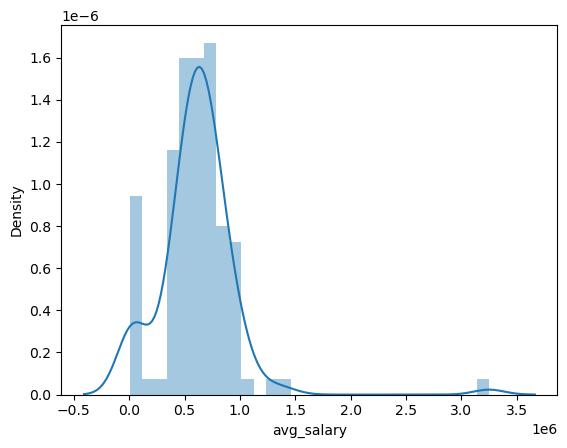

In [67]:
import seaborn as sns
sns.distplot(ytrain)

In [77]:
train_data.reset_index(drop = 'first', inplace = True)

D:\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (123). n_quantiles is set to n_samples.
  warnings.warn(


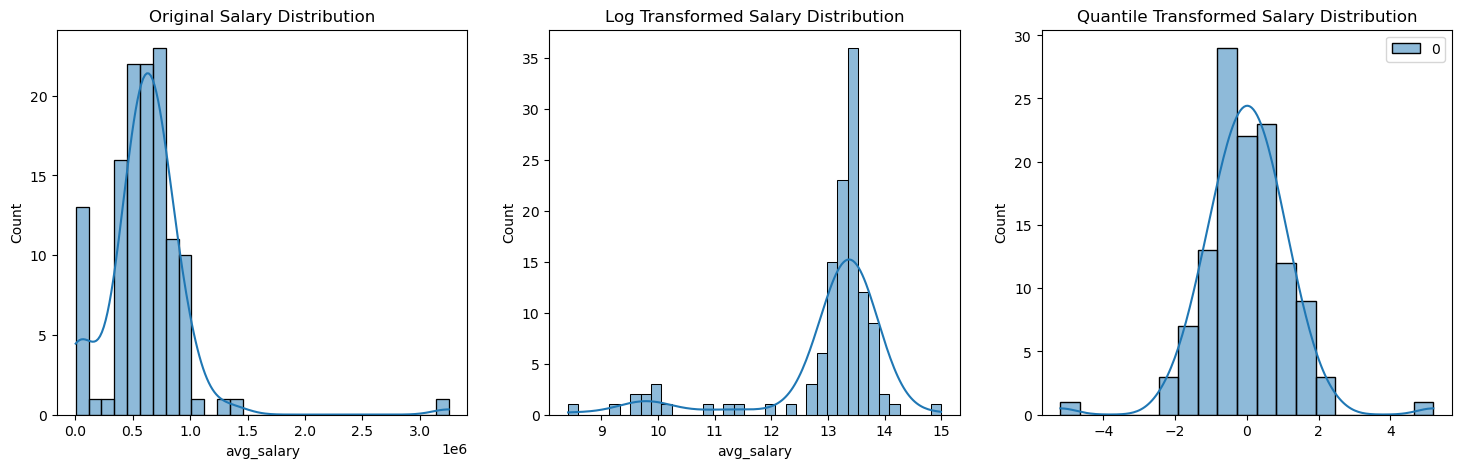

In [81]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
# Step 1: Log Transformation (Adding 1 to avoid log(0))
ytrain_log = np.log1p(train_data['avg_salary'])

# Step 2: Quantile Transformation (Normalizes skewed data)
qt = QuantileTransformer(output_distribution='normal', random_state=42)
ytrain_quantile = qt.fit_transform(train_data[['avg_salary']])

# Visualization to compare transformations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(ytrain, kde=True, ax=axes[0])
axes[0].set_title("Original Salary Distribution")

sns.histplot(ytrain_log, kde=True, ax=axes[1])
axes[1].set_title("Log Transformed Salary Distribution")

sns.histplot(ytrain_quantile, kde=True, ax=axes[2])
axes[2].set_title("Quantile Transformed Salary Distribution")

plt.show()


In [85]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [89]:
ytrain_quantile

array([[-0.32404807],
       [-0.08227727],
       [-0.32404807],
       [ 2.40003638],
       [-1.73938416],
       [-0.32404807],
       [ 0.67448975],
       [ 0.40085811],
       [-0.08227727],
       [-0.63628579],
       [ 0.40085811],
       [ 5.19933758],
       [ 1.10193069],
       [-0.53859848],
       [-1.14045123],
       [-1.8413262 ],
       [-2.13468333],
       [ 0.40085811],
       [ 0.40085811],
       [-0.32404807],
       [ 1.10193069],
       [ 1.96702501],
       [-1.57718007],
       [-0.7816399 ],
       [ 1.69453359],
       [ 1.41955352],
       [-1.20162669],
       [ 1.41955352],
       [ 0.67448975],
       [ 1.41955352],
       [-0.7816399 ],
       [ 1.69453359],
       [ 0.92983018],
       [-0.96196821],
       [-0.08227727],
       [ 0.14432239],
       [-0.63628579],
       [ 1.41955352],
       [-0.53859848],
       [-1.57718007],
       [ 0.40085811],
       [-1.96702501],
       [ 0.92983018],
       [ 0.92983018],
       [-0.96196821],
       [-1

In [91]:
evaluate(xtrain_pca, pd.DataFrame(ytrain_quantile), LinearRegression())

Cross-validation r2 scores: [-1.097400064908015, -1.793055427661796, -0.3538748789180768, -2.3381489305974434, -2.621801310496146]
Average r2 score: -1.6408561225162956
Cross-validation MAE scores: [1.3794540257473449, 1.273917894759916, 1.0329749610296788, 1.6111266342940953, 1.4113818410747874]
Average MAE: 1.3417710713811644
Cross-validation MSE scores: [4.000112898299964, 2.8785975224787683, 1.514564283305989, 5.733510540895922, 2.72074266492663]
Average MSE: 3.3695055819814543
Cross-validation RMSE scores: [2.000028224375837, 1.696643015627851, 1.2306763519731696, 2.394475003188783, 1.6494673882579887]
Average RMSE: 1.7942579966847259


In [93]:
evaluate(xtrain_pca, pd.DataFrame(ytrain_quantile), SVR())

Cross-validation r2 scores: [-0.04180656237554259, 0.040383959943656955, 0.21630244323843195, 0.11954288339097097, -0.20229685613302295]
Average r2 score: 0.026425173612898867
Cross-validation MAE scores: [0.9367100328690044, 0.7398542820703355, 0.765196029385693, 0.8168427977463235, 0.7778860568263616]
Average MAE: 0.8072978397795436
Cross-validation MSE scores: [1.986909382438071, 0.9890059209278109, 0.8767134591741415, 1.5122483339834736, 0.9031805093527233]
Average MSE: 1.253611521175244
Cross-validation RMSE scores: [1.4095777319602034, 0.9944877681137214, 0.9363297812064623, 1.2297350665828284, 0.9503580953265581]
Average RMSE: 1.1040976886379545


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

In [95]:
evaluate(xtrain_pca, pd.DataFrame(ytrain_quantile), XGBRegressor())

Cross-validation r2 scores: [-0.24025499820709229, 0.08776181936264038, -0.30150914192199707, 0.16169136762619019, -1.9666223526000977]
Average r2 score: -0.4517866611480713
Cross-validation MAE scores: [1.1033936154045478, 0.7776439068117829, 1.0066280956174045, 0.8826963591759379, 1.1594468272579703]
Average MAE: 0.9859617608535288
Cross-validation MSE scores: [2.365385638216779, 0.9401771102847821, 1.4559833511305929, 1.439855408975914, 2.2285638455029217]
Average MSE: 1.6859930708221982
Cross-validation RMSE scores: [1.53798102661144, 0.9696273048366482, 1.2066413514920633, 1.19993975222755, 1.4928375147694144]
Average RMSE: 1.2814053899874231


In [97]:
def evaluate(xtrain, ytrain, model, scaler=None):
    import numpy as np
    from sklearn.model_selection import KFold
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
    # Define KFold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Store the scores
    r2_scores = []
    mae_scores = []
    mse_scores = []
    rmse_scores = []
        
    # Perform cross-validation
    for train_index, val_index in kf.split(xtrain):
        if not isinstance(xtrain, np.ndarray):
            X_train, X_val = xtrain.values[train_index], xtrain.values[val_index]
        else:
            X_train, X_val = xtrain[train_index], xtrain[val_index]
        y_train, y_val = ytrain.iloc[train_index], ytrain.iloc[val_index]
        
        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        
        # Apply inverse transform if a scaler is provided
        if scaler:
            y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
            y_val = scaler.inverse_transform(y_val.values.reshape(-1, 1))

        # Evaluate the model
        mae_scores.append(mean_absolute_error(y_val, y_pred))
        mse_scores.append(mean_squared_error(y_val, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
        r2_scores.append(r2_score(y_val, y_pred))
        
    # Print the cross-validation scores
    print("Cross-validation r2 scores:", r2_scores)
    print("Average r2 score:", np.mean(r2_scores))
    
    print("Cross-validation MAE scores:", mae_scores)
    print(f"Average MAE: {np.mean(mae_scores)}")
    
    print("Cross-validation MSE scores:", mse_scores)
    print(f"Average MSE: {np.mean(mse_scores)}")
    
    print("Cross-validation RMSE scores:", rmse_scores)
    print(f"Average RMSE: {np.mean(rmse_scores)}")


In [101]:
evaluate(xtrain_pca, pd.DataFrame(ytrain_quantile), LinearRegression(), scaler=qt)


Cross-validation r2 scores: [-0.3954244747574114, -4.503005965494053, -0.2220488857755658, -15.214798659973475, -6.672191315965116]
Average r2 score: -5.401493860393124
Cross-validation MAE scores: [407428.38818684773, 411729.98711554916, 271010.6100999161, 573985.1900076194, 412947.30326996144]
Average MAE: 415420.2957359788
Cross-validation MSE scores: [464417582579.6191, 417113557576.1532, 122318341640.83377, 1049817673569.7583, 362746716476.3947]
Average MSE: 483282774368.55176
Cross-validation RMSE scores: [681481.9018723968, 645843.2918101365, 349740.391777721, 1024606.1065452218, 602284.5809718149]
Average RMSE: 660791.2545954582


D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitte

In [103]:
evaluate(xtrain_pca, pd.DataFrame(ytrain_quantile), SVR(), scaler=qt)


Cross-validation r2 scores: [-0.01890520172481769, 0.013325158488544764, 0.15629685440797114, 0.11546775780217755, -0.0835577833967649]
Average r2 score: 0.03652535711542217
Cross-validation MAE scores: [286483.61707285466, 184740.0, 211786.9534214589, 172052.02075619338, 177331.70620336928]
Average MAE: 206478.85949077524
Cross-validation MSE scores: [339106486393.7565, 74787390000.0, 84448642609.31462, 57268523660.04519, 51231390335.86166]
Average MSE: 121368486599.79561
Cross-validation RMSE scores: [582328.5038479195, 273472.8322886937, 290600.4862509948, 239308.42789180073, 226343.52284936642]
Average RMSE: 322410.754625755


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feat

In [105]:
evaluate(xtrain_pca, pd.DataFrame(ytrain_quantile), XGBRegressor(), scaler=qt)


D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitte

Cross-validation r2 scores: [-0.03068317886168881, 0.1295863714454395, -0.27158649396543844, -0.25591172030934795, -1.4718081302598476]
Average r2 score: -0.38008063039017664
Cross-validation MAE scores: [302903.6325390625, 181011.850625, 271038.658125, 205181.0244140625, 266423.7032470703]
Average MAE: 245311.77379003906
Cross-validation MSE scores: [343026368672.2543, 65975092057.99415, 127276701452.1052, 81313271171.158, 116868863937.94576]
Average MSE: 146892059458.29147
Cross-validation RMSE scores: [585684.5299922598, 256856.16998233495, 356758.60389359243, 285154.81965268974, 341860.88389569486]
Average RMSE: 365263.0014833143


D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


In [109]:
# # Filter out test samples where salary is -1 (unknown)
# valid_test_indices = ytrain_raw != -1  # Assuming 'ytrain_raw' is the original salary column
# xtest_valid = xtest_pca[valid_test_indices]
# ytest_valid = ytrain_quantile[valid_test_indices]
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Fit Dummy Regressor
dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(xtrain_pca, ytrain_quantile)

# Predict on filtered test data
y_pred_dummy = dummy_regressor.predict(xtrain_pca)

# Compute Metrics
r2_dummy = r2_score(ytrain_quantile, y_pred_dummy)
mae_dummy = mean_absolute_error(ytrain_quantile, y_pred_dummy)
mse_dummy = mean_squared_error(ytrain_quantile, y_pred_dummy)
rmse_dummy = np.sqrt(mse_dummy)

print(f"Dummy Regressor Performance on Valid Test Data:")
print(f"R² Score: {r2_dummy:.4f}")
print(f"MAE: {mae_dummy:.2f}")
print(f"MSE: {mse_dummy:.2f}")
print(f"RMSE: {rmse_dummy:.2f}")


Dummy Regressor Performance on Valid Test Data:
R² Score: 0.0000
MAE: 0.85
MSE: 1.35
RMSE: 1.16


### Imputing values in place of -1 for salary column

In [260]:
data.shape

(268, 210)

In [262]:
import pandas as pd
import numpy as np

# df = pd.read_csv("final_data.csv")
# # Assuming your salary column is 'avg_salary'
# # Replace -1 with NaN to facilitate imputation
data['avg_salary'] = data['avg_salary'].replace(-1, np.nan)

# # Option 1: Fill missing values with median salary of each job title
data['avg_salary'] = data.groupby('job_simp')['avg_salary'].transform(lambda x: x.fillna(x.median()))

data.isnull().sum()


company_encoded           0
rating                    0
job_simp                  0
employer_estimate         0
avg_salary                2
                         ..
manager data scientist    0
nlp engineer              0
other.2                   0
python automation         0
software developer        0
Length: 210, dtype: int64

In [264]:
data[data['avg_salary'].isna()]

,company_encoded,rating,job_simp,employer_estimate,avg_salary,Revenue,age_of_company,seniority,avg_size,len_description,...,data scientist,director,intern,machine learning engineer,manager,manager data scientist,nlp engineer,other.2,python automation,software developer
179,12,3.6,data related,0,NaN,9,1.0,2.0,15000.0,227,...,0,0,0,0,0,0,0,0,0,0
212,7,4.2,python automation,0,NaN,1,25.0,1.0,451.0,208,...,0,0,0,0,0,0,0,0,1,0


In [266]:
# Option 2: If still missing, fill with overall median
data['avg_salary'].fillna(data['avg_salary'].median(), inplace=True)
data.isnull().sum()

C:\Users\urvas\AppData\Local\Temp\ipykernel_26288\1311099099.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['avg_salary'].fillna(data['avg_salary'].median(), inplace=True)


company_encoded           0
rating                    0
job_simp                  0
employer_estimate         0
avg_salary                0
                         ..
manager data scientist    0
nlp engineer              0
other.2                   0
python automation         0
software developer        0
Length: 210, dtype: int64

In [268]:
data.shape

(268, 210)

In [272]:
#data.to_csv("imputed_salary_plus_encoded_df.csv", index = False)

In [171]:
data.drop(columns = ['job_simp'], inplace = True)

#### Train Test split

In [182]:
from sklearn.model_selection import train_test_split
x,y = data.drop('avg_salary', axis = 1), data.loc[:,'avg_salary']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state = 42, test_size = 0.2)


C:\Users\urvas\AppData\Local\Temp\ipykernel_26288\3043692023.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ytrain)


<Axes: xlabel='avg_salary', ylabel='Density'>

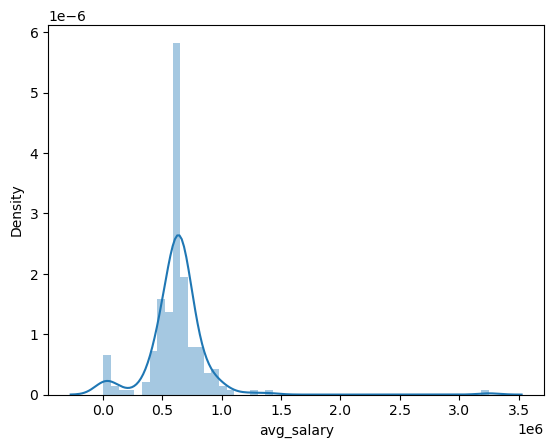

In [186]:
sns.distplot(ytrain)

D:\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (268). n_quantiles is set to n_samples.
  warnings.warn(


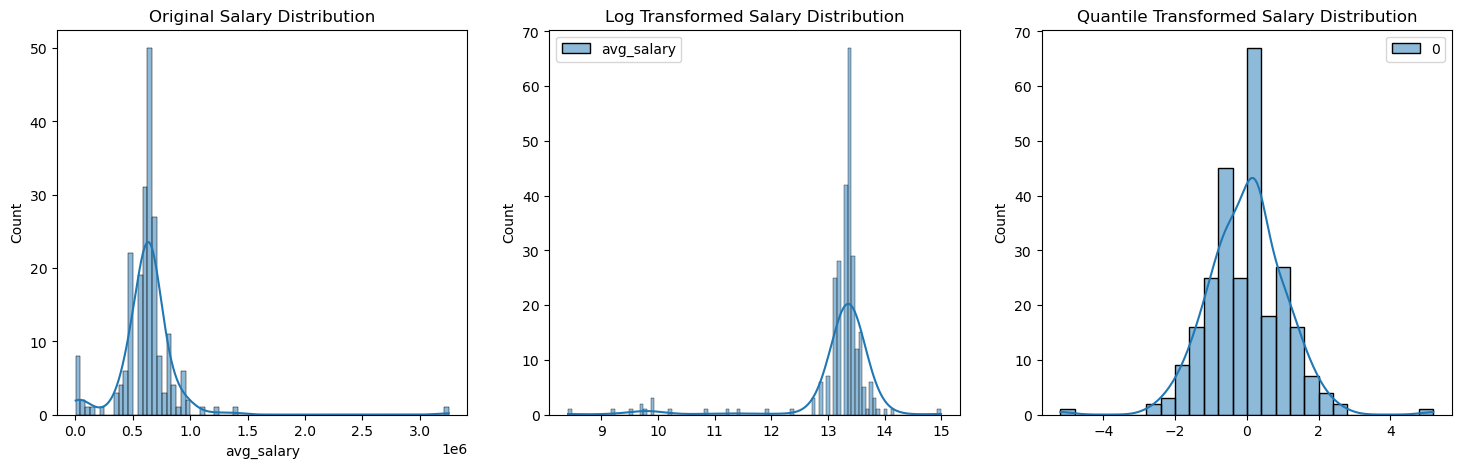

In [192]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
# Step 1: Log Transformation (Adding 1 to avoid log(0))
ytrain_log = np.log1p(data[['avg_salary']])

# Step 2: Quantile Transformation (Normalizes skewed data)
qt = QuantileTransformer(output_distribution='normal', random_state=42)
ytrain_quantile = qt.fit_transform(data[['avg_salary']])

# Visualization to compare transformations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(ytrain, kde=True, ax=axes[0])
axes[0].set_title("Original Salary Distribution")

sns.histplot(ytrain_log, kde=True, ax=axes[1])
axes[1].set_title("Log Transformed Salary Distribution")

sns.histplot(ytrain_quantile, kde=True, ax=axes[2])
axes[2].set_title("Quantile Transformed Salary Distribution")

plt.show()


In [194]:
evaluate(xtrain, pd.DataFrame(ytrain_quantile), LinearRegression(), scaler=qt)


Cross-validation r2 scores: [-46.95864274490405, -29.784435455164306, -3.4191952809704436, -30.55851569252329, -11.88604578420686]
Average r2 score: -24.521366991553787
Cross-validation MAE scores: [694125.8520558515, 580939.4132181704, 534656.1720029564, 826474.4666975144, 345645.58219464787]
Average MAE: 596368.2972338281
Cross-validation MSE scores: [1452733821957.5684, 1028705450564.9099, 874941526629.6421, 1613275043000.279, 471319543082.21484]
Average MSE: 1088195077046.9229
Cross-validation RMSE scores: [1205294.0811094893, 1014251.1772558659, 935383.0908401338, 1270147.6461420848, 686527.1612122967]
Average RMSE: 1022320.6313119743


D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitte

In [196]:
evaluate(xtrain, pd.DataFrame(ytrain_quantile), SVR(), scaler=qt)


Cross-validation r2 scores: [-0.23213207275973247, -0.014746440156970131, 0.0017438926533089871, -0.004032422475667596, -0.07759464119652804]
Average r2 score: -0.06535233678711785
Cross-validation MAE scores: [110598.83720930232, 114831.3953488372, 175273.2558139535, 140860.4651162789, 125892.85714285716]
Average MAE: 133491.36212624583
Cross-validation MSE scores: [37322989825.5814, 33909187500.0, 197641350290.69766, 51326255813.9532, 39414062500.000015]
Average MSE: 71922769186.04645
Cross-validation RMSE scores: [193191.5883924075, 184144.47453019055, 444568.72392319463, 226552.98676899672, 198529.75217835742]
Average RMSE: 249397.50515862936


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feat

In [198]:
evaluate(xtrain_pca, pd.DataFrame(ytrain_quantile), XGBRegressor(), scaler=qt)


D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitte

Cross-validation r2 scores: [0.08943344188787494, 0.04752479005017729, -3.551254286555311, -0.6247676264865252, -1.1009248215490404]
Average r2 score: -1.0279977005305647
Cross-validation MAE scores: [217660.0, 139699.415, 292224.51749999967, 131458.33333333337, 193721.86362711593]
Average MAE: 194952.8258920898
Cross-validation MSE scores: [281472490000.0, 43499575603.555626, 331101885153.1408, 50923015625.00002, 89888373962.98582]
Average MSE: 159377068068.93646
Cross-validation RMSE scores: [530539.8100048667, 208565.51873105878, 575414.5333176255, 225661.28517093937, 299813.89888226637]
Average RMSE: 367999.00922135136


D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


In [202]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.90)
xtrain_pca = pca.fit_transform(xtrain)
xtest_pca = pca.transform(xtest)
pca.explained_variance_ratio_.shape

(1,)

In [208]:
evaluate(xtrain_pca, pd.DataFrame(ytrain_quantile), LinearRegression(), scaler=qt)

Cross-validation r2 scores: [-0.23213207275973247, -0.014746440156970131, 0.0017438926533089871, -0.004032422475667596, -0.07759464119652804]
Average r2 score: -0.06535233678711785
Cross-validation MAE scores: [110598.83720930232, 114831.3953488372, 175273.2558139535, 140860.4651162789, 125892.85714285716]
Average MAE: 133491.36212624583
Cross-validation MSE scores: [37322989825.5814, 33909187500.0, 197641350290.69766, 51326255813.9532, 39414062500.000015]
Average MSE: 71922769186.04645
Cross-validation RMSE scores: [193191.5883924075, 184144.47453019055, 444568.72392319463, 226552.98676899672, 198529.75217835742]
Average RMSE: 249397.50515862936


D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitte

In [210]:
evaluate(xtrain_pca, ytrain, LinearRegression())

Cross-validation r2 scores: [-0.05163449101073936, -0.032984775430266566, -0.009005636706810982, -0.14556778275028548, -0.10533371111431866]
Average r2 score: -0.06890527940248421
Cross-validation MAE scores: [185843.7514458974, 131862.95793541585, 103163.88169598255, 125934.04115826567, 153129.53702785488]
Average MAE: 139986.83385268328
Cross-validation MSE scores: [194590944441.5559, 46507179878.284836, 25770757646.137707, 42368647715.32216, 57122615422.83993]
Average MSE: 73272029020.8281
Cross-validation RMSE scores: [441124.63594947394, 215655.2338300298, 160532.73076272546, 205836.45866396496, 239003.37952179657]
Average RMSE: 252430.48774559813


In [212]:
from sklearn.metrics import r2_score

In [230]:
lr_pred = LinearRegression().fit(xtrain_pca,ytrain).predict(xtest_pca)
lasso_pred = Lasso(alpha = 0.2).fit(xtrain_pca,ytrain).predict(xtest_pca)

In [232]:
svr_pred = SVR().fit(xtrain_pca,ytrain).predict(xtest_pca)
xgb_pred = XGBRegressor().fit(xtrain_pca,ytrain).predict(xtest_pca)

In [234]:
r2_score(ytest, lr_pred)

-0.015250095100140859

In [236]:
r2_score(ytest, lasso_pred)

-0.01525009519774212

In [238]:
r2_score(ytest, svr_pred)

-0.10115081460961406

In [240]:
r2_score(ytest, xgb_pred)

-1.553943577386991